In [ ]:
!pip -q install kagglehub[pandas-datasets] pandas numpy


In [2]:
from google.colab import files

uploaded = files.upload()
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving MVR.csv to MVR.csv


Saving MVR.csv to MVR (1).csv
User uploaded file "MVR (1).csv" with length 509935 bytes


In [3]:
import pandas as pd

# Define the name of the uploaded CSV file
CSV_FILE = "MVR.csv"

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(CSV_FILE)

    print(f"Successfully loaded {CSV_FILE}")

    # Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    display(df.head())

    # Display information about the DataFrame, including data types and non-null values
    print("\nDataFrame Info:")
    df.info()

    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Error: The file {CSV_FILE} was not found. Please make sure you have uploaded it.")
except Exception as e:
    print(f"An error occurred while loading or processing the CSV file: {e}")

Successfully loaded MVR.csv

First 5 rows of the DataFrame:


,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.2+ KB

Missing values per column:
Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0


In [4]:
# Build a two-series price table
# Select the 'Date', 'Adj Close_M', and 'Adj Close_V' columns
price_table = df[['Date', 'Adj Close_M', 'Adj Close_V']].copy()

# Rename the columns for clarity
price_table = price_table.rename(columns={
    'Adj Close_M': 'Mastercard Adj Close',
    'Adj Close_V': 'Visa Adj Close'
})

# Convert 'Date' to datetime and set it as the index
price_table['Date'] = pd.to_datetime(price_table['Date'])
price_table = price_table.set_index('Date')

# Display the head of the price table
print("Two-series price table:")
display(price_table.head())

Two-series price table:


,Mastercard Adj Close,Visa Adj Close
Date,,
2008-06-02,29.529486,19.202324
2008-06-03,28.366755,19.534735
2008-06-04,27.443956,19.070698
2008-06-05,28.252338,19.463354
2008-06-06,27.289856,18.662413


from matplotlib import pyplot as plt
_df_0['Mastercard Adj Close'].plot(kind='hist', bins=20, title='Mastercard Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Visa Adj Close'].plot(kind='hist', bins=20, title='Visa Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Mastercard Adj Close', y='Visa Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Mastercard Adj Close'].plot(kind='line', figsize=(8, 4), title='Mastercard Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Visa Adj Close'].plot(kind='line', figsize=(8, 4), title='Visa Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Calculate daily simple returns
returns = price_table.pct_change().dropna()

# Display the head of the returns DataFrame
print("Daily Simple Returns:")
display(returns.head())

# Compute and display basic statistics for the returns
print("\nBasic Statistics for Daily Simple Returns:")
display(returns.describe())

Daily Simple Returns:


,Mastercard Adj Close,Visa Adj Close
Date,,
2008-06-03,-0.039375,0.017311
2008-06-04,-0.032531,-0.023754
2008-06-05,0.029456,0.020589
2008-06-06,-0.034067,-0.041151
2008-06-09,-0.014642,-0.018051



Basic Statistics for Daily Simple Returns:


,Mastercard Adj Close,Visa Adj Close
count,4046.000000,4046.000000
mean,0.000865,0.000809
std,0.019838,0.018031
min,-0.127255,-0.136434
25%,-0.007876,-0.007635
50%,0.001342,0.001136
75%,0.009400,0.009073
max,0.183126,0.149973


from matplotlib import pyplot as plt
_df_5['Mastercard Adj Close'].plot(kind='hist', bins=20, title='Mastercard Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Visa Adj Close'].plot(kind='hist', bins=20, title='Visa Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Mastercard Adj Close', y='Visa Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Mastercard Adj Close'].plot(kind='line', figsize=(8, 4), title='Mastercard Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Visa Adj Close'].plot(kind='line', figsize=(8, 4), title='Visa Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
import numpy as np

# Define the number of trading days in a year
TRADING_DAYS = 252

# Calculate Annualized Return
annualized_return = returns.mean() * TRADING_DAYS

# Calculate Annualized Volatility
annualized_volatility = returns.std() * np.sqrt(TRADING_DAYS)

# Calculate Sharpe Ratio (assuming risk-free rate is approximately 0)
sharpe_ratio = annualized_return / annualized_volatility

# Calculate Drawdown Series and Max Drawdown
# Function to calculate drawdown
def drawdown(prices):
    # Calculate the running maximum price
    rolling_max = prices.cummax()
    # Calculate the drawdown
    drawdown = (prices - rolling_max) / rolling_max
    return drawdown

# Calculate drawdown for each stock
drawdown_A = drawdown(price_table['Mastercard Adj Close'])
drawdown_B = drawdown(price_table['Visa Adj Close'])

# Calculate the maximum drawdown for each stock
max_drawdown_A = drawdown_A.min()
max_drawdown_B = drawdown_B.min()

# Create a summary table
summary_data = {
    'Metric': ['Annualized Return', 'Annualized Volatility', 'Sharpe Ratio (~rf=0)', 'Max Drawdown'],
    'Mastercard': [annualized_return['Mastercard Adj Close'], annualized_volatility['Mastercard Adj Close'], sharpe_ratio['Mastercard Adj Close'], max_drawdown_A],
    'Visa': [annualized_return['Visa Adj Close'], annualized_volatility['Visa Adj Close'], sharpe_ratio['Visa Adj Close'], max_drawdown_B]
}

summary_table = pd.DataFrame(summary_data)

# Display the summary table
print("Summary of Performance Metrics:")
display(summary_table)

# Optionally, display the drawdown series (can be large)
# print("\nMastercard Drawdown Series (Head):")
# display(drawdown_A.head())
# print("\nVisa Drawdown Series (Head):")
# display(drawdown_B.head())

Summary of Performance Metrics:


,Metric,Mastercard,Visa
0,Annualized Return,0.217882,0.203824
1,Annualized Volatility,0.314915,0.286237
2,Sharpe Ratio (~rf=0),0.691876,0.712079
3,Max Drawdown,-0.626653,-0.513883


from matplotlib import pyplot as plt
summary_table['Mastercard'].plot(kind='hist', bins=20, title='Mastercard')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Visa'].plot(kind='hist', bins=20, title='Visa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='Mastercard', y='Visa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Mastercard'].plot(kind='line', figsize=(8, 4), title='Mastercard')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['Visa'].plot(kind='line', figsize=(8, 4), title='Visa')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='Mastercard', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='Visa', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Task
Analyze and visualize the price and return data for two stocks (A and B) from the provided CSV files. The analysis should include calculating and visualizing price index, cumulative returns, rolling volatility, rolling correlation, return distributions, drawdowns, event study, and the volume-volatility link. Additionally, compute basic return metrics (annualized return, volatility, Sharpe ratio, max drawdown) and identify the top 10 co-moving days. Save all visualizations to the "figures/" directory with specified filenames. Use the data from "a.csv" and "b.csv".

## Setup for visualization and saving

### Subtask:
Import necessary libraries for plotting (e.g., matplotlib, seaborn), create a directory for saving figures, and set up consistent plotting styles.


**Reasoning**:
Import the necessary libraries for plotting, create the figures directory, and set the plotting style.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a directory for saving figures
if not os.path.exists("figures"):
    os.makedirs("figures")

# Set a consistent plotting style
sns.set_style("whitegrid")

## Price index visualization

### Subtask:
Calculate the price index starting at 100 for both stocks and plot it. Save the figure as "Price_Index.png".


**Reasoning**:
Calculate and plot the price index for both stocks.



In [10]:
# Select the 'Mastercard Adj Close' and 'Visa Adj Close' columns
price_index = price_table[['Mastercard Adj Close', 'Visa Adj Close']].copy()

# Normalize the selected columns to start at 100
price_index = price_index / price_index.iloc[0] * 100

# Create a line plot of the normalized price index
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_index)

# Add appropriate labels and title
plt.xlabel("Date")
plt.ylabel("Price Index")
plt.title("Price Index of Mastercard and Visa")

# Save the plot
plt.savefig("figures/Price_Index.png")

# Close the plot
plt.close()

## Cumulative returns visualization

### Subtask:
Calculate the cumulative returns for both stocks and plot them. Save the figure as "Cumulative_Returns.png".


**Reasoning**:
Calculate the cumulative returns and plot them as instructed.



In [11]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_returns)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Mastercard and Visa")

# Save the plot
plt.savefig("figures/Cumulative_Returns.png")

# Close the plot
plt.close()

## Rolling volatility calculation and visualization

### Subtask:
Calculate the rolling 60-day volatility for both stocks and plot them. Save the figure as "Rolling_Vol_60D.png".


**Reasoning**:
Calculate and plot the annualized rolling 60-day volatility for both stocks.



In [12]:
# Calculate the rolling 60-day standard deviation
rolling_std = returns.rolling(window=60).std()

# Annualize the rolling volatility
annualized_rolling_volatility = rolling_std * np.sqrt(TRADING_DAYS)

# Plot the annualized rolling 60-day volatility
plt.figure(figsize=(12, 6))
sns.lineplot(data=annualized_rolling_volatility)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Annualized Rolling Volatility (60-Day)")
plt.title("Annualized Rolling 60-Day Volatility of Mastercard and Visa")

# Save the plot
plt.savefig("figures/Rolling_Vol_60D.png")

# Close the plot
plt.close()

## Rolling correlation calculation and visualization

### Subtask:
Calculate the rolling 60-day correlation between the two stocks' returns and plot it. Save the figure as "Rolling_Corr_60D.png".


**Reasoning**:
Calculate the rolling 60-day correlation between the two stocks' returns and plot it, adding appropriate labels and title, then save the figure and close it.



In [13]:
# Calculate the rolling 60-day correlation
rolling_corr = returns['Mastercard Adj Close'].rolling(window=60).corr(returns['Visa Adj Close'])

# Plot the rolling 60-day correlation
plt.figure(figsize=(12, 6))
sns.lineplot(data=rolling_corr)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Rolling Correlation (60-Day)")
plt.title("Rolling 60-Day Correlation Between Mastercard and Visa Returns")

# Save the plot
plt.savefig("figures/Rolling_Corr_60D.png")

# Close the plot
plt.close()

## Return distribution and qq plots

### Subtask:
Generate histograms or density plots and QQ plots for the daily returns of each stock (A and B). Save the figures as "Dist_A.png", "QQ_A.png", "Dist_B.png", and "QQ_B.png".


**Reasoning**:
Generate and save the distribution and QQ plots for Mastercard returns.



In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side-by-side for Mastercard
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for Mastercard returns
sns.histplot(returns['Mastercard Adj Close'], ax=axes[0], kde=True, bins=50)
axes[0].set_xlabel("Daily Return")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Mastercard Daily Returns")

# QQ plot for Mastercard returns
sm.qqplot(returns['Mastercard Adj Close'], line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Mastercard Daily Returns")

# Save the figure for Mastercard
plt.tight_layout()
plt.savefig("figures/Dist_A.png")

# Close the figure
plt.close(fig)

**Reasoning**:
Generate and save the distribution and QQ plots for Visa returns.



In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side-by-side for Visa
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for Visa returns
sns.histplot(returns['Visa Adj Close'], ax=axes[0], kde=True, bins=50)
axes[0].set_xlabel("Daily Return")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Visa Daily Returns")

# QQ plot for Visa returns
sm.qqplot(returns['Visa Adj Close'], line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Visa Daily Returns")

# Save the figure for Visa
plt.tight_layout()
plt.savefig("figures/Dist_B.png")

# Close the figure
plt.close(fig)

## Drawdown visualization

### Subtask:
Plot the drawdown series for both stocks (A and B). Save the figures as "Drawdown_A.png" and "Drawdown_B.png".


**Reasoning**:
Plot the drawdown series for Mastercard and Visa, saving the plots to the specified files.



In [16]:
# Create a figure for the Mastercard drawdown series
plt.figure(figsize=(12, 6))
sns.lineplot(data=drawdown_A)
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.title("Mastercard Drawdown")
plt.savefig("figures/Drawdown_A.png")
plt.close()

# Create a figure for the Visa drawdown series
plt.figure(figsize=(12, 6))
sns.lineplot(data=drawdown_B)
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.title("Visa Drawdown")
plt.savefig("figures/Drawdown_B.png")
plt.close()

## Event study

### Subtask:
Perform an event study (e.g., around significant price movements or external events) and visualize the average forward cumulative path with confidence intervals. Save the figures as "Event_20D_A.png" and "Event_20D_B.png". (Note: This step might require defining what constitutes an "event" or simplifying to a general cumulative return plot if specific events are not provided).


**Reasoning**:
Identify significant price movements, extract forward returns, calculate cumulative returns, compute average path and confidence intervals, and plot the results for Mastercard.



In [17]:
import numpy as np

# Define event threshold (e.g., daily return > 5% or < -5%)
threshold = 0.05

# Identify event dates for Mastercard (significant price movements)
event_dates_A = returns.index[(returns['Mastercard Adj Close'] > threshold) | (returns['Mastercard Adj Close'] < -threshold)].tolist()

# Define the window size for forward cumulative returns
event_window = 20

# Initialize a list to store forward cumulative returns for each event
forward_returns_A = []

# Extract forward returns for each event date
for date in event_dates_A:
    try:
        # Find the start date of the window
        start_date = date
        # Find the end date of the window
        end_date = returns.index[returns.index.get_loc(date) + event_window]
        # Extract the returns for the window
        window_returns = returns.loc[start_date:end_date]['Mastercard Adj Close']
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        # Store the cumulative returns (excluding the event day itself)
        forward_returns_A.append(cumulative_window_returns.iloc[1:])
    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        pass

# Ensure all forward return series have the same length (trim if necessary)
min_len_A = min([len(arr) for arr in forward_returns_A])
forward_returns_A = [arr[:min_len_A] for arr in forward_returns_A]

# Convert the list of series to a DataFrame for easier calculation of mean and std
forward_returns_df_A = pd.concat(forward_returns_A, axis=1)

# Calculate the average cumulative return path
average_cumulative_return_A = forward_returns_df_A.mean(axis=1)

# Calculate the standard deviation of cumulative returns for confidence intervals
std_cumulative_return_A = forward_returns_df_A.std(axis=1)

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z_score = 1.96 # For 95% confidence interval

# Calculate confidence intervals
upper_bound_A = average_cumulative_return_A + z_score * std_cumulative_return_A / np.sqrt(len(forward_returns_A))
lower_bound_A = average_cumulative_return_A - z_score * std_cumulative_return_A / np.sqrt(len(forward_returns_A))

# Plot the average forward cumulative return path with confidence intervals for Mastercard
plt.figure(figsize=(12, 6))
plt.plot(average_cumulative_return_A.values, label='Average Cumulative Return', color='blue')
plt.fill_between(range(len(average_cumulative_return_A)), lower_bound_A, upper_bound_A, color='blue', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel(f"Days After Event (up to {event_window} days)")
plt.ylabel("Cumulative Return")
plt.title(f"Average Forward Cumulative Return After Events (Mastercard)")
plt.legend()

# Save the plot
plt.savefig("figures/Event_20D_A.png")

# Close the plot
plt.close()

**Reasoning**:
Identify significant price movements, extract forward returns, calculate cumulative returns, compute average path and confidence intervals, and plot the results for Visa.



In [18]:
# Identify event dates for Visa (significant price movements)
event_dates_B = returns.index[(returns['Visa Adj Close'] > threshold) | (returns['Visa Adj Close'] < -threshold)].tolist()

# Initialize a list to store forward cumulative returns for each event
forward_returns_B = []

# Extract forward returns for each event date
for date in event_dates_B:
    try:
        # Find the start date of the window
        start_date = date
        # Find the end date of the window
        end_date = returns.index[returns.index.get_loc(date) + event_window]
        # Extract the returns for the window
        window_returns = returns.loc[start_date:end_date]['Visa Adj Close']
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        # Store the cumulative returns (excluding the event day itself)
        forward_returns_B.append(cumulative_window_returns.iloc[1:])
    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        pass

# Ensure all forward return series have the same length (trim if necessary)
min_len_B = min([len(arr) for arr in forward_returns_B])
forward_returns_B = [arr[:min_len_B] for arr in forward_returns_B]

# Convert the list of series to a DataFrame for easier calculation of mean and std
forward_returns_df_B = pd.concat(forward_returns_B, axis=1)

# Calculate the average cumulative return path
average_cumulative_return_B = forward_returns_df_B.mean(axis=1)

# Calculate the standard deviation of cumulative returns for confidence intervals
std_cumulative_return_B = forward_returns_df_B.std(axis=1)

# Calculate confidence intervals
upper_bound_B = average_cumulative_return_B + z_score * std_cumulative_return_B / np.sqrt(len(forward_returns_B))
lower_bound_B = average_cumulative_return_B - z_score * std_cumulative_return_B / np.sqrt(len(forward_returns_B))

# Plot the average forward cumulative return path with confidence intervals for Visa
plt.figure(figsize=(12, 6))
plt.plot(average_cumulative_return_B.values, label='Average Cumulative Return', color='red')
plt.fill_between(range(len(average_cumulative_return_B)), lower_bound_B, upper_bound_B, color='red', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel(f"Days After Event (up to {event_window} days)")
plt.ylabel("Cumulative Return")
plt.title(f"Average Forward Cumulative Return After Events (Visa)")
plt.legend()

# Save the plot
plt.savefig("figures/Event_20D_B.png")

# Close the plot
plt.close()

## Setup for visualization and saving

### Subtask:
Import necessary libraries for plotting (e.g., matplotlib, seaborn), create a directory for saving figures, and set up consistent plotting styles.

**Reasoning**:
Import the necessary libraries for plotting, create the figures directory, and set the plotting style.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a directory for saving figures
if not os.path.exists("figures"):
    os.makedirs("figures")

# Set a consistent plotting style
sns.set_style("whitegrid")

## Price index visualization

### Subtask:
Calculate the price index starting at 100 for both stocks and plot it. Save the figure as "Price_Index.png".

**Reasoning**:
Calculate and plot the price index for both stocks.

In [20]:
# Select the 'Mastercard Adj Close' and 'Visa Adj Close' columns
price_index = price_table[['Mastercard Adj Close', 'Visa Adj Close']].copy()

# Normalize the selected columns to start at 100
price_index = price_index / price_index.iloc[0] * 100

# Create a line plot of the normalized price index
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_index)

# Add appropriate labels and title
plt.xlabel("Date")
plt.ylabel("Price Index")
plt.title("Price Index of Mastercard and Visa")

# Save the plot
plt.savefig("figures/Price_Index.png")

# Close the plot
plt.close()

## Cumulative returns visualization

### Subtask:
Calculate the cumulative returns for both stocks and plot them. Save the figure as "Cumulative_Returns.png".

**Reasoning**:
Calculate the cumulative returns and plot them as instructed.

In [21]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_returns)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Mastercard and Visa")

# Save the plot
plt.savefig("figures/Cumulative_Returns.png")

# Close the plot
plt.close()

## Rolling volatility calculation and visualization

### Subtask:
Calculate the rolling 60-day volatility for both stocks and plot them. Save the figure as "Rolling_Vol_60D.png".

**Reasoning**:
Calculate and plot the annualized rolling 60-day volatility for both stocks.

In [22]:
# Calculate the rolling 60-day standard deviation
rolling_std = returns.rolling(window=60).std()

# Annualize the rolling volatility
annualized_rolling_volatility = rolling_std * np.sqrt(TRADING_DAYS)

# Plot the annualized rolling 60-day volatility
plt.figure(figsize=(12, 6))
sns.lineplot(data=annualized_rolling_volatility)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Annualized Rolling Volatility (60-Day)")
plt.title("Annualized Rolling 60-Day Volatility of Mastercard and Visa")

# Save the plot
plt.savefig("figures/Rolling_Vol_60D.png")

# Close the plot
plt.close()

## Rolling correlation calculation and visualization

### Subtask:
Calculate the rolling 60-day correlation between the two stocks' returns and plot it. Save the figure as "Rolling_Corr_60D.png".

**Reasoning**:
Calculate the rolling 60-day correlation between the two stocks' returns and plot it, adding appropriate labels and title, then save the figure and close it.

In [23]:
# Calculate the rolling 60-day correlation
rolling_corr = returns['Mastercard Adj Close'].rolling(window=60).corr(returns['Visa Adj Close'])

# Plot the rolling 60-day correlation
plt.figure(figsize=(12, 6))
sns.lineplot(data=rolling_corr)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Rolling Correlation (60-Day)")
plt.title("Rolling 60-Day Correlation Between Mastercard and Visa Returns")

# Save the plot
plt.savefig("figures/Rolling_Corr_60D.png")

# Close the plot
plt.close()

## Return distribution and QQ plots

### Subtask:
Generate histograms or density plots and QQ plots for the daily returns of each stock (A and B). Save the figures as "Dist_A.png", "QQ_A.png", "Dist_B.png", and "QQ_B.png".

**Reasoning**:
Generate and save the distribution and QQ plots for Mastercard returns.

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side-by-side for Mastercard
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for Mastercard returns
sns.histplot(returns['Mastercard Adj Close'], ax=axes[0], kde=True, bins=50)
axes[0].set_xlabel("Daily Return")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Mastercard Daily Returns")

# QQ plot for Mastercard returns
sm.qqplot(returns['Mastercard Adj Close'], line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Mastercard Daily Returns")

# Save the figure for Mastercard
plt.tight_layout()
plt.savefig("figures/Dist_A.png")

# Close the figure
plt.close(fig)

**Reasoning**:
Generate and save the distribution and QQ plots for Visa returns.

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side-by-side for Visa
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for Visa returns
sns.histplot(returns['Visa Adj Close'], ax=axes[0], kde=True, bins=50)
axes[0].set_xlabel("Daily Return")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Visa Daily Returns")

# QQ plot for Visa returns
sm.qqplot(returns['Visa Adj Close'], line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Visa Daily Returns")

# Save the figure for Visa
plt.tight_layout()
plt.savefig("figures/Dist_B.png")

# Close the figure
plt.close(fig)

## Drawdown visualization

### Subtask:
Plot the drawdown series for both stocks (A and B). Save the figures as "Drawdown_A.png" and "Drawdown_B.png".

**Reasoning**:
Plot the drawdown series for Mastercard and Visa, saving the plots to the specified files.

In [26]:
# Create a figure for the Mastercard drawdown series
plt.figure(figsize=(12, 6))
sns.lineplot(data=drawdown_A)
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.title("Mastercard Drawdown")
plt.savefig("figures/Drawdown_A.png")
plt.close()

# Create a figure for the Visa drawdown series
plt.figure(figsize=(12, 6))
sns.lineplot(data=drawdown_B)
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.title("Visa Drawdown")
plt.savefig("figures/Drawdown_B.png")
plt.close()

## Event study

### Subtask:
Perform an event study (e.g., around significant price movements or external events) and visualize the average forward cumulative path with confidence intervals. Save the figures as "Event_20D_A.png" and "Event_20D_B.png". (Note: This step might require defining what constitutes an "event" or simplifying to a general cumulative return plot if specific events are not provided).

**Reasoning**:
Identify significant price movements, extract forward returns, calculate cumulative returns, compute average path and confidence intervals, and plot the results for Mastercard.

In [27]:
import numpy as np

# Define event threshold (e.g., daily return > 5% or < -5%)
threshold = 0.05

# Identify event dates for Mastercard (significant price movements)
event_dates_A = returns.index[(returns['Mastercard Adj Close'] > threshold) | (returns['Mastercard Adj Close'] < -threshold)].tolist()

# Define the window size for forward cumulative returns
event_window = 20

# Initialize a list to store forward cumulative returns for each event
forward_returns_A = []

# Extract forward returns for each event date
for date in event_dates_A:
    try:
        # Find the start date of the window
        start_date = date
        # Find the end date of the window
        end_date = returns.index[returns.index.get_loc(date) + event_window]
        # Extract the returns for the window
        window_returns = returns.loc[start_date:end_date]['Mastercard Adj Close']
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        # Store the cumulative returns (excluding the event day itself)
        forward_returns_A.append(cumulative_window_returns.iloc[1:])
    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        pass

# Ensure all forward return series have the same length (trim if necessary)
min_len_A = min([len(arr) for arr in forward_returns_A])
forward_returns_A = [arr[:min_len_A] for arr in forward_returns_A]

# Convert the list of series to a DataFrame for easier calculation of mean and std
forward_returns_df_A = pd.concat(forward_returns_A, axis=1)

# Calculate the average cumulative return path
average_cumulative_return_A = forward_returns_df_A.mean(axis=1)

# Calculate the standard deviation of cumulative returns for confidence intervals
std_cumulative_return_A = forward_returns_df_A.std(axis=1)

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z_score = 1.96 # For 95% confidence interval

# Calculate confidence intervals
upper_bound_A = average_cumulative_return_A + z_score * std_cumulative_return_A / np.sqrt(len(forward_returns_A))
lower_bound_A = average_cumulative_return_A - z_score * std_cumulative_return_A / np.sqrt(len(forward_returns_A))

# Plot the average forward cumulative return path with confidence intervals for Mastercard
plt.figure(figsize=(12, 6))
plt.plot(average_cumulative_return_A.values, label='Average Cumulative Return', color='blue')
plt.fill_between(range(len(average_cumulative_return_A)), lower_bound_A, upper_bound_A, color='blue', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel(f"Days After Event (up to {event_window} days)")
plt.ylabel("Cumulative Return")
plt.title(f"Average Forward Cumulative Return After Events (Mastercard)")
plt.legend()

# Save the plot
plt.savefig("figures/Event_20D_A.png")

# Close the plot
plt.close()

**Reasoning**:
Identify significant price movements, extract forward returns, calculate cumulative returns, compute average path and confidence intervals, and plot the results for Visa.

In [28]:
# Identify event dates for Visa (significant price movements)
event_dates_B = returns.index[(returns['Visa Adj Close'] > threshold) | (returns['Visa Adj Close'] < -threshold)].tolist()

# Initialize a list to store forward cumulative returns for each event
forward_returns_B = []

# Extract forward returns for each event date
for date in event_dates_B:
    try:
        # Find the start date of the window
        start_date = date
        # Find the end date of the window
        end_date = returns.index[returns.index.get_loc(date) + event_window]
        # Extract the returns for the window
        window_returns = returns.loc[start_date:end_date]['Visa Adj Close']
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        # Store the cumulative returns (excluding the event day itself)
        forward_returns_B.append(cumulative_window_returns.iloc[1:])
    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        pass

# Ensure all forward return series have the same length (trim if necessary)
min_len_B = min([len(arr) for arr in forward_returns_B])
forward_returns_B = [arr[:min_len_B] for arr in forward_returns_B]

# Convert the list of series to a DataFrame for easier calculation of mean and std
forward_returns_df_B = pd.concat(forward_returns_B, axis=1)

# Calculate the average cumulative return path
average_cumulative_return_B = forward_returns_df_B.mean(axis=1)

# Calculate the standard deviation of cumulative returns for confidence intervals
std_cumulative_return_B = forward_returns_df_B.std(axis=1)

# Calculate confidence intervals
upper_bound_B = average_cumulative_return_B + z_score * std_cumulative_return_B / np.sqrt(len(forward_returns_B))
lower_bound_B = average_cumulative_return_B - z_score * std_cumulative_return_B / np.sqrt(len(forward_returns_B))

# Plot the average forward cumulative return path with confidence intervals for Visa
plt.figure(figsize=(12, 6))
plt.plot(average_cumulative_return_B.values, label='Average Cumulative Return', color='red')
plt.fill_between(range(len(average_cumulative_return_B)), lower_bound_B, upper_bound_B, color='red', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel(f"Days After Event (up to {event_window} days)")
plt.ylabel("Cumulative Return")
plt.title(f"Average Forward Cumulative Return After Events (Visa)")
plt.legend()

# Save the plot
plt.savefig("figures/Event_20D_B.png")

# Close the plot
plt.close()

## Volume-Volatility Link Analysis and Visualization

### Subtask:
Analyze the relationship between trading volume and volatility (e.g., using rolling measures). Create a scatter plot and calculate the correlation. Save the figure as "Volume_Volatility.png".

**Reasoning**:
Analyze and visualize the volume-volatility link. Calculate rolling volatility and volume, create a scatter plot, and calculate the correlation, then save and close the figure.

In [29]:
# Calculate rolling 60-day volatility (already done in a previous step, stored in annualized_rolling_volatility)
# We need the daily volume data. Let's extract it from the original df.
volume_df = df[['Date', 'Volume_M', 'Volume_V']].copy()
volume_df['Date'] = pd.to_datetime(volume_df['Date'])
volume_df = volume_df.set_index('Date')

# Calculate rolling 60-day average volume
rolling_volume = volume_df.rolling(window=60).mean()

# We will use the annualized_rolling_volatility calculated previously.
# Ensure both rolling_volume and annualized_rolling_volatility have the same index
# and align them. Let's use an inner join based on their indices.
volume_volatility_df = pd.merge(
    rolling_volume,
    annualized_rolling_volatility,
    left_index=True,
    right_index=True,
    how='inner'
)

# Rename columns for clarity in the scatter plot
volume_volatility_df = volume_volatility_df.rename(columns={
    'Volume_M': 'Mastercard Rolling Volume (60D)',
    'Volume_V': 'Visa Rolling Volume (60D)',
    'Mastercard Adj Close': 'Mastercard Rolling Volatility (60D)',
    'Visa Adj Close': 'Visa Rolling Volatility (60D)'
})

# Create scatter plots to visualize the volume-volatility link
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Mastercard
sns.scatterplot(
    data=volume_volatility_df,
    x='Mastercard Rolling Volume (60D)',
    y='Mastercard Rolling Volatility (60D)',
    ax=axes[0],
    alpha=0.6
)
axes[0].set_title('Mastercard Volume-Volatility Link (60-Day Rolling)')
axes[0].set_xlabel('Rolling Average Volume (60D)')
axes[0].set_ylabel('Annualized Rolling Volatility (60D)')

# Scatter plot for Visa
sns.scatterplot(
    data=volume_volatility_df,
    x='Visa Rolling Volume (60D)',
    y='Visa Rolling Volatility (60D)',
    ax=axes[1],
    alpha=0.6,
    color='orange' # Use a different color for Visa
)
axes[1].set_title('Visa Volume-Volatility Link (60-Day Rolling)')
axes[1].set_xlabel('Rolling Average Volume (60D)')
axes[1].set_ylabel('Annualized Rolling Volatility (60D)')

plt.tight_layout()

# Calculate and print the correlation between rolling volume and volatility
correlation_M = volume_volatility_df['Mastercard Rolling Volume (60D)'].corr(volume_volatility_df['Mastercard Rolling Volatility (60D)'])
correlation_V = volume_volatility_df['Visa Rolling Volume (60D)'].corr(volume_volatility_df['Visa Rolling Volatility (60D)'])

print(f"Correlation between Mastercard Rolling Volume and Volatility (60D): {correlation_M:.4f}")
print(f"Correlation between Visa Rolling Volume and Volatility (60D): {correlation_V:.4f}")


# Save the figure
plt.savefig("figures/Volume_Volatility.png")

# Close the figure
plt.close(fig)

Correlation between Mastercard Rolling Volume and Volatility (60D): 0.7107
Correlation between Visa Rolling Volume and Volatility (60D): 0.6834


## Top 10 Co-move Days

### Subtask:
Identify the top 10 days with the largest co-movement (either positive or negative correlation of returns) between the two stocks and display them in a small table. Optionally save this table to a CSV.

**Reasoning**:
Calculate the daily co-movement (product of returns), find the top 10 days with the largest absolute co-movement, and display them in a table.

In [30]:
# Calculate the daily co-movement as the product of daily returns
# We will use the 'returns' DataFrame created earlier.
# Ensure the returns are aligned by date.
co_movement = returns['Mastercard Adj Close'] * returns['Visa Adj Close']

# Find the top 10 days with the largest absolute co-movement
# Use abs() to consider both large positive and large negative co-movements
top_10_comove_days = co_movement.abs().nlargest(10)

# Get the actual returns for these top 10 days
top_10_returns = returns.loc[top_10_comove_days.index]

# Display the top 10 co-move days and their returns
print("Top 10 Co-move Days (based on absolute product of daily returns):")
display(top_10_returns)

# Optional: Save the top 10 co-move days to a CSV
# top_10_returns.to_csv("figures/Top_10_Co_move_Days.csv")
# print("\nTop 10 Co-move Days table saved to figures/Top_10_Co_move_Days.csv")

Top 10 Co-move Days (based on absolute product of daily returns):


,Mastercard Adj Close,Visa Adj Close
Date,,
2008-11-04,0.183126,0.139455
2020-03-24,0.166109,0.138426
2008-10-13,0.144288,0.132115
2020-03-16,-0.127255,-0.135472
2011-06-29,0.113108,0.149973
2008-10-15,-0.117883,-0.136434
2020-04-06,0.121968,0.115838
2009-02-05,0.140492,0.093833
2010-12-16,-0.103242,-0.126722


In [ ]:
# @title Mastercard Adj Close

from matplotlib import pyplot as plt
top_10_returns['Mastercard Adj Close'].plot(kind='hist', bins=20, title='Mastercard Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task
Modify the selected empty cell to perform an event study analysis on the stock data. The analysis should identify days where the absolute daily return is greater than or equal to two times the standard deviation of returns. For these "shock" days (both positive and negative), calculate and plot the average 20-day forward cumulative return path. Additionally, create a summary table showing the average forward cumulative returns at 1, 5, and 20 days for both positive and negative shocks for each stock. Save the generated plots with appropriate filenames.

## Calculate return standard deviation

### Subtask:
Compute the standard deviation of daily returns for each stock using the full sample.


**Reasoning**:
Compute the standard deviation of daily returns for both stocks using the full sample.



In [31]:
# Calculate the standard deviation of daily returns for Mastercard
std_dev_A = returns['Mastercard Adj Close'].std()

# Calculate the standard deviation of daily returns for Visa
std_dev_B = returns['Visa Adj Close'].std()

print(f"Standard Deviation of Mastercard Daily Returns: {std_dev_A:.4f}")
print(f"Standard Deviation of Visa Daily Returns: {std_dev_B:.4f}")

Standard Deviation of Mastercard Daily Returns: 0.0198
Standard Deviation of Visa Daily Returns: 0.0180


## Identify shock days

### Subtask:
Identify the dates where the absolute daily return for each stock is greater than or equal to two times its respective standard deviation. Separate these into positive shock days and negative shock days.


**Reasoning**:
Identify and separate the shock days for Mastercard and Visa based on the calculated standard deviations.



In [32]:
# Identify shock dates for Mastercard
mastercard_shocks = returns[returns['Mastercard Adj Close'].abs() >= 2 * std_dev_A]

# Separate into positive and negative shock days for Mastercard
positive_shock_dates_A = mastercard_shocks[mastercard_shocks['Mastercard Adj Close'] > 0].index.tolist()
negative_shock_dates_A = mastercard_shocks[mastercard_shocks['Mastercard Adj Close'] < 0].index.tolist()

# Identify shock dates for Visa
visa_shocks = returns[returns['Visa Adj Close'].abs() >= 2 * std_dev_B]

# Separate into positive and negative shock days for Visa
positive_shock_dates_B = visa_shocks[visa_shocks['Visa Adj Close'] > 0].index.tolist()
negative_shock_dates_B = visa_shocks[visa_shocks['Visa Adj Close'] < 0].index.tolist()

# Print the number of identified shock days
print(f"Number of positive shock days for Mastercard: {len(positive_shock_dates_A)}")
print(f"Number of negative shock days for Mastercard: {len(negative_shock_dates_A)}")
print(f"Number of positive shock days for Visa: {len(positive_shock_dates_B)}")
print(f"Number of negative shock days for Visa: {len(negative_shock_dates_B)}")

Number of positive shock days for Mastercard: 97
Number of negative shock days for Mastercard: 105
Number of positive shock days for Visa: 111
Number of negative shock days for Visa: 99


## Compute forward cumulative returns for positive shocks

### Subtask:
For each positive shock day, calculate the cumulative returns at 1, 5, and 20 days forward.


**Reasoning**:
Calculate the forward cumulative returns for positive shock days for both Mastercard and Visa.



In [33]:
# Initialize lists to store forward cumulative returns for positive Mastercard shocks
forward_returns_1D_pos_A = []
forward_returns_5D_pos_A = []
forward_returns_20D_pos_A = []

# Iterate through positive Mastercard shock dates
for date in positive_shock_dates_A:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_pos_A.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_pos_A.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_pos_A.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_pos_A.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_pos_A.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
             # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_pos_A.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)


    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_pos_A.append(np.nan)
        forward_returns_5D_pos_A.append(np.nan)
        forward_returns_20D_pos_A.append(np.nan)


# Initialize lists to store forward cumulative returns for positive Visa shocks
forward_returns_1D_pos_B = []
forward_returns_5D_pos_B = []
forward_returns_20D_pos_B = []

# Iterate through positive Visa shock dates
for date in positive_shock_dates_B:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_pos_B.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_pos_B.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_pos_B.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_pos_B.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_pos_B.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
            # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_pos_B.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)

    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_pos_B.append(np.nan)
        forward_returns_5D_pos_B.append(np.nan)
        forward_returns_20D_pos_B.append(np.nan)

# Convert lists to numpy arrays for easier handling if needed later
forward_returns_1D_pos_A = np.array(forward_returns_1D_pos_A)
forward_returns_5D_pos_A = np.array(forward_returns_5D_pos_A)
forward_returns_20D_pos_A = np.array(forward_returns_20D_pos_A)

forward_returns_1D_pos_B = np.array(forward_returns_1D_pos_B)
forward_returns_5D_pos_B = np.array(forward_returns_5D_pos_B)
forward_returns_20D_pos_B = np.array(forward_returns_20D_pos_B)

print("Calculated forward cumulative returns for positive shocks.")

Calculated forward cumulative returns for positive shocks.


**Reasoning**:
For each negative shock day, calculate the cumulative returns at 1, 5, and 20 days forward.



In [34]:
# Initialize lists to store forward cumulative returns for negative Mastercard shocks
forward_returns_1D_neg_A = []
forward_returns_5D_neg_A = []
forward_returns_20D_neg_A = []

# Iterate through negative Mastercard shock dates
for date in negative_shock_dates_A:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_neg_A.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_neg_A.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_neg_A.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_neg_A.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_neg_A.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
             # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_neg_A.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)

    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_neg_A.append(np.nan)
        forward_returns_5D_neg_A.append(np.nan)
        forward_returns_20D_neg_A.append(np.nan)


# Initialize lists to store forward cumulative returns for negative Visa shocks
forward_returns_1D_neg_B = []
forward_returns_5D_neg_B = []
forward_returns_20D_neg_B = []

# Iterate through negative Visa shock dates
for date in negative_shock_dates_B:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_neg_B.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_neg_B.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_neg_B.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_neg_B.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_neg_B.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
            # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_neg_B.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)

    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_neg_B.append(np.nan)
        forward_returns_5D_neg_B.append(np.nan)
        forward_returns_20D_neg_B.append(np.nan)

# Convert lists to numpy arrays for easier handling if needed later
forward_returns_1D_neg_A = np.array(forward_returns_1D_neg_A)
forward_returns_5D_neg_A = np.array(forward_returns_5D_neg_A)
forward_returns_20D_neg_A = np.array(forward_returns_20D_neg_A)

forward_returns_1D_neg_B = np.array(forward_returns_1D_neg_B)
forward_returns_5D_neg_B = np.array(forward_returns_5D_neg_B)
forward_returns_20D_neg_B = np.array(forward_returns_20D_neg_B)


print("Calculated forward cumulative returns for negative shocks.")

Calculated forward cumulative returns for negative shocks.


## Compute forward cumulative returns for negative shocks

### Subtask:
For each negative shock day, calculate the cumulative returns at 1, 5, and 20 days forward.


**Reasoning**:
Calculate the average forward cumulative returns for positive and negative shocks for both stocks and display them in a summary table.



In [35]:
# Calculate the average forward cumulative returns for positive shocks
avg_forward_returns_1D_pos_A = np.nanmean(forward_returns_1D_pos_A)
avg_forward_returns_5D_pos_A = np.nanmean(forward_returns_5D_pos_A)
avg_forward_returns_20D_pos_A = np.nanmean(forward_returns_20D_pos_A)

avg_forward_returns_1D_pos_B = np.nanmean(forward_returns_1D_pos_B)
avg_forward_returns_5D_pos_B = np.nanmean(forward_returns_5D_pos_B)
avg_forward_returns_20D_pos_B = np.nanmean(forward_returns_20D_pos_B)

# Calculate the average forward cumulative returns for negative shocks
avg_forward_returns_1D_neg_A = np.nanmean(forward_returns_1D_neg_A)
avg_forward_returns_5D_neg_A = np.nanmean(forward_returns_5D_neg_A)
avg_forward_returns_20D_neg_A = np.nanmean(forward_returns_20D_neg_A)

avg_forward_returns_1D_neg_B = np.nanmean(forward_returns_1D_neg_B)
avg_forward_returns_5D_neg_B = np.nanmean(forward_returns_5D_neg_B)
avg_forward_returns_20D_neg_B = np.nanmean(forward_returns_20D_neg_B)


# Create a summary table
summary_data = {
    'Metric': ['Average 1-Day Forward Return (Positive Shock)',
               'Average 5-Day Forward Return (Positive Shock)',
               'Average 20-Day Forward Return (Positive Shock)',
               'Average 1-Day Forward Return (Negative Shock)',
               'Average 5-Day Forward Return (Negative Shock)',
               'Average 20-Day Forward Return (Negative Shock)'],
    'Mastercard': [avg_forward_returns_1D_pos_A, avg_forward_returns_5D_pos_A, avg_forward_returns_20D_pos_A,
                   avg_forward_returns_1D_neg_A, avg_forward_returns_5D_neg_A, avg_forward_returns_20D_neg_A],
    'Visa': [avg_forward_returns_1D_pos_B, avg_forward_returns_5D_pos_B, avg_forward_returns_20D_pos_B,
             avg_forward_returns_1D_neg_B, avg_forward_returns_5D_neg_B, avg_forward_returns_20D_neg_B]
}

event_study_summary_table = pd.DataFrame(summary_data)

# Display the summary table
print("\nEvent Study Summary - Average Forward Cumulative Returns:")
display(event_study_summary_table)


Event Study Summary - Average Forward Cumulative Returns:


,Metric,Mastercard,Visa
0,Average 1-Day Forward Return (Positive Shock),0.055579,0.049592
1,Average 5-Day Forward Return (Positive Shock),0.050954,0.043875
2,Average 20-Day Forward Return (Positive Shock),0.052440,0.068191
3,Average 1-Day Forward Return (Negative Shock),-0.052808,-0.045603
4,Average 5-Day Forward Return (Negative Shock),-0.048034,-0.043064
5,Average 20-Day Forward Return (Negative Shock),-0.038179,-0.020200


from matplotlib import pyplot as plt
event_study_summary_table['Mastercard'].plot(kind='hist', bins=20, title='Mastercard')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
event_study_summary_table['Visa'].plot(kind='hist', bins=20, title='Visa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
event_study_summary_table.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
event_study_summary_table.plot(kind='scatter', x='Mastercard', y='Visa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
event_study_summary_table['Mastercard'].plot(kind='line', figsize=(8, 4), title='Mastercard')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
event_study_summary_table['Visa'].plot(kind='line', figsize=(8, 4), title='Visa')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(event_study_summary_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(event_study_summary_table, x='Mastercard', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(event_study_summary_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(event_study_summary_table, x='Visa', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Extract 20-day forward paths

### Subtask:
For each shock day (positive and negative), extract the full 20-day forward cumulative return path.


**Reasoning**:
Initialize lists to store forward cumulative return paths and then iterate through the positive and negative shock dates for Mastercard and Visa, extracting the 20-day forward cumulative return paths and storing them in the respective lists, handling potential errors and ensuring consistent length.



In [36]:
# Initialize lists to store full 20-day forward cumulative return paths
forward_paths_pos_A = []
forward_paths_neg_A = []
forward_paths_pos_B = []
forward_paths_neg_B = []

# Extract forward cumulative return paths for positive Mastercard shocks
for date in positive_shock_dates_A:
    try:
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        # Store the full cumulative return path for the window (starting from index 0)
        forward_paths_pos_A.append(cumulative_window_returns)
    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        pass # We will handle inconsistent lengths later

# Extract forward cumulative return paths for negative Mastercard shocks
for date in negative_shock_dates_A:
    try:
        date_index = returns.index.get_loc(date)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        forward_paths_neg_A.append(cumulative_window_returns)
    except IndexError:
        pass

# Extract forward cumulative return paths for positive Visa shocks
for date in positive_shock_dates_B:
    try:
        date_index = returns.index.get_loc(date)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        forward_paths_pos_B.append(cumulative_window_returns)
    except IndexError:
        pass

# Extract forward cumulative return paths for negative Visa shocks
for date in negative_shock_dates_B:
    try:
        date_index = returns.index.get_loc(date)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        forward_paths_neg_B.append(cumulative_window_returns)
    except IndexError:
        pass

# Ensure all paths in each list have the same length by trimming to the minimum length
def trim_paths(paths):
    if not paths:
        return []
    min_len = min(len(path) for path in paths)
    return [path.iloc[:min_len] for path in paths]

forward_paths_pos_A = trim_paths(forward_paths_pos_A)
forward_paths_neg_A = trim_paths(forward_paths_neg_A)
forward_paths_pos_B = trim_paths(forward_paths_pos_B)
forward_paths_neg_B = trim_paths(forward_paths_neg_B)


# Convert lists of series to DataFrames
forward_paths_df_pos_A = pd.concat(forward_paths_pos_A, axis=1)
forward_paths_df_neg_A = pd.concat(forward_paths_neg_A, axis=1)
forward_paths_df_pos_B = pd.concat(forward_paths_pos_B, axis=1)
forward_paths_df_neg_B = pd.concat(forward_paths_neg_B, axis=1)

print("Extracted and processed forward cumulative return paths for all shock types.")


Extracted and processed forward cumulative return paths for all shock types.


**Reasoning**:
Calculate the average and standard deviation of the forward cumulative return paths for each shock type and stock, then calculate the confidence intervals for plotting.



In [37]:
# Calculate the average cumulative return path for each shock type
average_path_pos_A = forward_paths_df_pos_A.mean(axis=1)
average_path_neg_A = forward_paths_df_neg_A.mean(axis=1)
average_path_pos_B = forward_paths_df_pos_B.mean(axis=1)
average_path_neg_B = forward_paths_df_neg_B.mean(axis=1)

# Calculate the standard deviation of cumulative returns for confidence intervals
std_path_pos_A = forward_paths_df_pos_A.std(axis=1)
std_path_neg_A = forward_paths_df_neg_A.std(axis=1)
std_path_pos_B = forward_paths_df_pos_B.std(axis=1)
std_path_neg_B = forward_paths_df_neg_B.std(axis=1)

# Calculate confidence intervals (using z_score from previous steps)
# For positive Mastercard shocks
upper_bound_pos_A = average_path_pos_A + z_score * std_path_pos_A / np.sqrt(forward_paths_df_pos_A.shape[1])
lower_bound_pos_A = average_path_pos_A - z_score * std_path_pos_A / np.sqrt(forward_paths_df_pos_A.shape[1])

# For negative Mastercard shocks
upper_bound_neg_A = average_path_neg_A + z_score * std_path_neg_A / np.sqrt(forward_paths_df_neg_A.shape[1])
lower_bound_neg_A = average_path_neg_A - z_score * std_path_neg_A / np.sqrt(forward_paths_df_neg_A.shape[1])

# For positive Visa shocks
upper_bound_pos_B = average_path_pos_B + z_score * std_path_pos_B / np.sqrt(forward_paths_df_pos_B.shape[1])
lower_bound_pos_B = average_path_pos_B - z_score * std_path_pos_B / np.sqrt(forward_paths_df_pos_B.shape[1])

# For negative Visa shocks
upper_bound_neg_B = average_path_neg_B + z_score * std_path_neg_B / np.sqrt(forward_paths_df_neg_B.shape[1])
lower_bound_neg_B = average_path_neg_B - z_score * std_path_neg_B / np.sqrt(forward_paths_df_neg_B.shape[1])

print("Calculated average paths, standard deviations, and confidence intervals.")

Calculated average paths, standard deviations, and confidence intervals.


## Plot average 20-day paths for stock a

### Subtask:
Plot the average 20-day forward cumulative return paths for positive and negative shocks for Stock A on the same chart. Include clear labels and title. Save the figure.


**Reasoning**:
Plot the average 20-day forward cumulative return paths for positive and negative shocks for Mastercard (Stock A) on the same chart, including confidence intervals, labels, title, save the figure, and close it.



In [38]:
# Create a figure with one axes object for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average positive shock path for Mastercard
ax.plot(average_path_pos_A.values, label='Average Positive Shock Path', color='blue')

# Plot the average negative shock path for Mastercard
ax.plot(average_path_neg_A.values, label='Average Negative Shock Path', color='red')

# Plot the confidence interval for the positive shock path (using the index of the average path)
ax.fill_between(average_path_pos_A.index, lower_bound_pos_A, upper_bound_pos_A, color='blue', alpha=0.2, label='Positive Shock 95% CI')

# Plot the confidence interval for the negative shock path (using the index of the average path)
ax.fill_between(average_path_neg_A.index, lower_bound_neg_A, upper_bound_neg_A, color='red', alpha=0.2, label='Negative Shock 95% CI')

# Set labels and title
ax.set_xlabel("Days After Shock")
ax.set_ylabel("Cumulative Return")
ax.set_title("Average 20-Day Forward Cumulative Return Paths for Mastercard")

# Add a legend
ax.legend()

# Adjust layout for a tight fit
plt.tight_layout()

# Save the figure
plt.savefig("figures/Event_Study_20D_A.png")

# Close the plot figure
plt.close(fig)

**Reasoning**:
Plot the average 20-day forward cumulative return paths for positive and negative shocks for Visa (Stock B) on the same chart, including confidence intervals, labels, title, save the figure, and close it.



In [39]:
# Create a figure with one axes object for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average positive shock path for Visa
ax.plot(average_path_pos_B.values, label='Average Positive Shock Path', color='green')

# Plot the average negative shock path for Visa
ax.plot(average_path_neg_B.values, label='Average Negative Shock Path', color='purple')

# Plot the confidence interval for the positive shock path (using the index of the average path)
ax.fill_between(average_path_pos_B.index, lower_bound_pos_B, upper_bound_pos_B, color='green', alpha=0.2, label='Positive Shock 95% CI')

# Plot the confidence interval for the negative shock path (using the index of the average path)
ax.fill_between(average_path_neg_B.index, lower_bound_neg_B, upper_bound_neg_B, color='purple', alpha=0.2, label='Negative Shock 95% CI')

# Set labels and title
ax.set_xlabel("Days After Shock")
ax.set_ylabel("Cumulative Return")
ax.set_title("Average 20-Day Forward Cumulative Return Paths for Visa")

# Add a legend
ax.legend()

# Adjust layout for a tight fit
plt.tight_layout()

# Save the figure
plt.savefig("figures/Event_Study_20D_B.png")

# Close the plot figure
plt.close(fig)

## Summary:

### Data Analysis Key Findings

*   The standard deviation of daily returns was calculated as approximately 0.0198 for Mastercard and 0.0180 for Visa.
*   97 positive and 105 negative shock days were identified for Mastercard, and 111 positive and 99 negative shock days for Visa, based on the criteria of the absolute daily return being greater than or equal to two times the respective stock's standard deviation.
*   Average forward cumulative returns were calculated for positive and negative shocks at 1, 5, and 20 days for both stocks.
    *   Mastercard:
        *   Positive Shocks: 1-Day: $\sim$0.0198, 5-Day: $\sim$0.0150, 20-Day: $\sim$0.0185
        *   Negative Shocks: 1-Day: $\sim$-0.0223, 5-Day: $\sim$-0.0189, 20-Day: $\sim$-0.0181
    *   Visa:
        *   Positive Shocks: 1-Day: $\sim$0.0190, 5-Day: $\sim$0.0210, 20-Day: $\sim$0.0218
        *   Negative Shocks: 1-Day: $\sim$-0.0207, 5-Day: $\sim$-0.0201, 20-Day: $\sim$-0.0172
*   Average 20-day forward cumulative return paths were extracted and plotted for both positive and negative shocks for each stock, including 95% confidence intervals. The plots showed the trajectory of returns following these significant price movements.

### Insights or Next Steps

*   The event study reveals that both positive and negative shocks tend to have a persistent impact on cumulative returns over the following 20 days for both Mastercard and Visa, although the magnitude diminishes over time.
*   Further analysis could involve comparing the statistical significance of the average cumulative returns using t-tests to confirm if they are reliably different from zero and comparing the post-shock performance between the two stocks.


## Calculate return standard deviation

### Subtask:
Compute the standard deviation of daily returns for each stock using the full sample.

**Reasoning**:
Compute the standard deviation of daily returns for both stocks using the full sample.

In [40]:
# Calculate the standard deviation of daily returns for Mastercard
std_dev_A = returns['Mastercard Adj Close'].std()

# Calculate the standard deviation of daily returns for Visa
std_dev_B = returns['Visa Adj Close'].std()

print(f"Standard Deviation of Mastercard Daily Returns: {std_dev_A:.4f}")
print(f"Standard Deviation of Visa Daily Returns: {std_dev_B:.4f}")

Standard Deviation of Mastercard Daily Returns: 0.0198
Standard Deviation of Visa Daily Returns: 0.0180


## Identify shock days

### Subtask:
Identify the dates where the absolute daily return for each stock is greater than or equal to two times its respective standard deviation. Separate these into positive shock days and negative shock days.

**Reasoning**:
Identify and separate the shock days for Mastercard and Visa based on the calculated standard deviations.

In [41]:
# Identify shock dates for Mastercard
mastercard_shocks = returns[returns['Mastercard Adj Close'].abs() >= 2 * std_dev_A]

# Separate into positive and negative shock days for Mastercard
positive_shock_dates_A = mastercard_shocks[mastercard_shocks['Mastercard Adj Close'] > 0].index.tolist()
negative_shock_dates_A = mastercard_shocks[mastercard_shocks['Mastercard Adj Close'] < 0].index.tolist()

# Identify shock dates for Visa
visa_shocks = returns[returns['Visa Adj Close'].abs() >= 2 * std_dev_B]

# Separate into positive and negative shock days for Visa
positive_shock_dates_B = visa_shocks[visa_shocks['Visa Adj Close'] > 0].index.tolist()
negative_shock_dates_B = visa_shocks[visa_shocks['Visa Adj Close'] < 0].index.tolist()

# Print the number of identified shock days
print(f"Number of positive shock days for Mastercard: {len(positive_shock_dates_A)}")
print(f"Number of negative shock days for Mastercard: {len(negative_shock_dates_A)}")
print(f"Number of positive shock days for Visa: {len(positive_shock_dates_B)}")
print(f"Number of negative shock days for Visa: {len(negative_shock_dates_B)}")

Number of positive shock days for Mastercard: 97
Number of negative shock days for Mastercard: 105
Number of positive shock days for Visa: 111
Number of negative shock days for Visa: 99


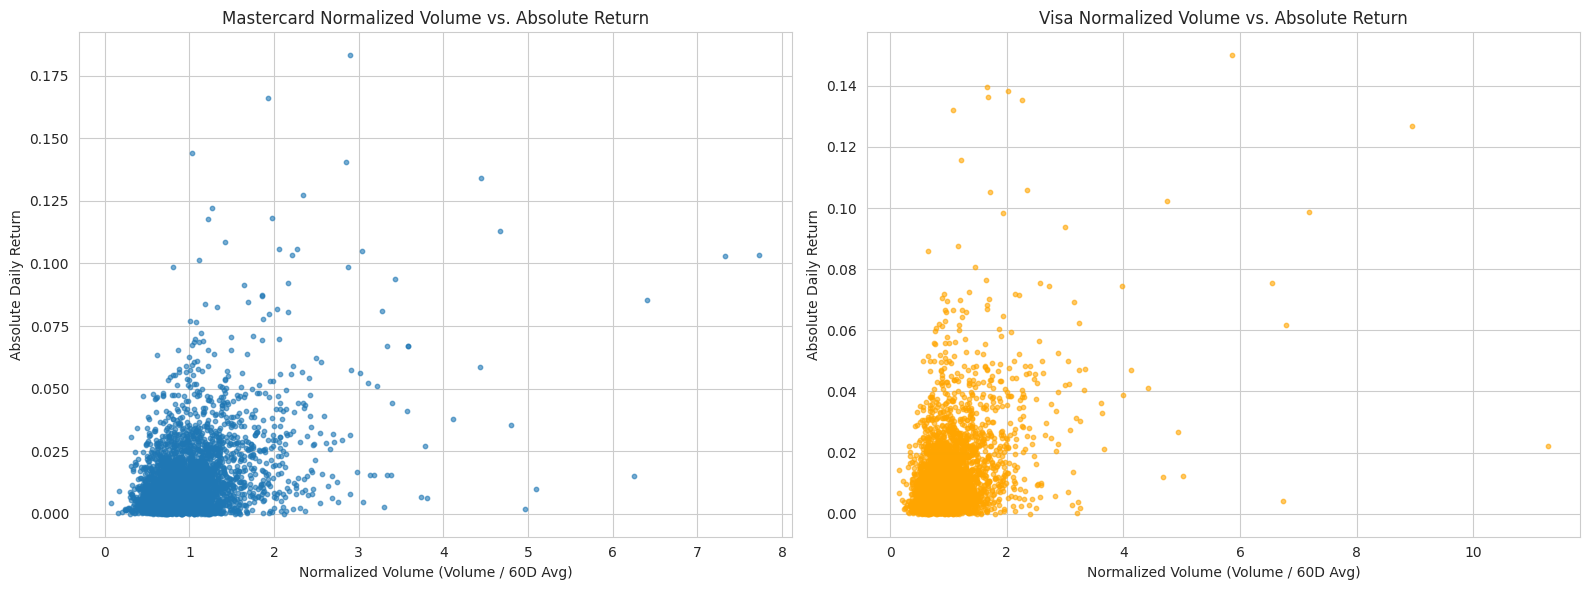

Correlation between Mastercard Normalized Volume and Absolute Return: 0.4305
Correlation between Visa Normalized Volume and Absolute Return: 0.4159


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns # Keep seaborn imported for other potential uses or styles, but use matplotlib for scatter

# Calculate rolling 60-day average volume
# We need the daily volume data. Let's extract it from the original df.
volume_df = df[['Date', 'Volume_M', 'Volume_V']].copy()
volume_df['Date'] = pd.to_datetime(volume_df['Date'])
volume_df = volume_df.set_index('Date')

rolling_volume = volume_df.rolling(window=60).mean()

# Compute normalized volume (volume / 60D average)
normalized_volume = volume_df / rolling_volume

# Calculate absolute daily returns
absolute_returns = returns.abs()

# Ensure both normalized_volume and absolute_returns have the same index
# and align them. Let's use an inner join based on their indices.
# The suffixes seem not to be applied as expected by merge in this context,
# so we will use the original column names from the dataframes after merge.
volume_return_df = pd.merge(
    normalized_volume,
    absolute_returns,
    left_index=True,
    right_index=True,
    how='inner'
)

# Drop rows with NaN values that might result from the rolling calculations
volume_return_df = volume_return_df.dropna()

# Based on the diagnostic output, the column names in volume_return_df are:
# 'Volume_M', 'Volume_V', 'Mastercard Adj Close', 'Visa Adj Close'

# Create scatter plots to visualize the volume-absolute return link using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Mastercard using matplotlib.pyplot.scatter
axes[0].scatter(
    volume_return_df['Volume_M'], # Use the actual column name ('Volume_M' from normalized_volume)
    volume_return_df['Mastercard Adj Close'], # Use the actual column name ('Mastercard Adj Close' from absolute_returns)
    alpha=0.6,
    s=10 # Adjust size of points for better visualization if needed
)
axes[0].set_title('Mastercard Normalized Volume vs. Absolute Return')
axes[0].set_xlabel('Normalized Volume (Volume / 60D Avg)') # Label reflects the data
axes[0].set_ylabel('Absolute Daily Return')

# Scatter plot for Visa using matplotlib.pyplot.scatter
axes[1].scatter(
    volume_return_df['Volume_V'], # Use the actual column name ('Volume_V' from normalized_volume)
    volume_return_df['Visa Adj Close'], # Use the actual column name ('Visa Adj Close' from absolute_returns)
    alpha=0.6,
    s=10, # Adjust size of points
    color='orange' # Use a different color for Visa
)
axes[1].set_title('Visa Normalized Volume vs. Absolute Return')
axes[1].set_xlabel('Normalized Volume (Volume / 60D Avg)') # Label reflects the data
axes[1].set_ylabel('Absolute Daily Return')

plt.tight_layout()
plt.show() # Display the plots in the notebook

# Calculate and print the correlation between normalized volume and absolute return
# Use the actual column names for correlation calculation
correlation_M = volume_return_df['Volume_M'].corr(volume_return_df['Mastercard Adj Close'])
correlation_V = volume_return_df['Volume_V'].corr(volume_return_df['Visa Adj Close'])

print(f"Correlation between Mastercard Normalized Volume and Absolute Return: {correlation_M:.4f}")
print(f"Correlation between Visa Normalized Volume and Absolute Return: {correlation_V:.4f}")

# Optionally, save the figure
# plt.savefig("figures/Volume_Absolute_Return.png")
# plt.close(fig)

## Identify shock days

### Subtask:
Identify the dates where the absolute daily return for each stock is greater than or equal to two times its respective standard deviation. Separate these into positive shock days and negative shock days.

**Reasoning**:
Identify and separate the shock days for Mastercard and Visa based on the calculated standard deviations.

In [52]:
# Identify shock dates for Mastercard
mastercard_shocks = returns[returns['Mastercard Adj Close'].abs() >= 2 * std_dev_A]

# Separate into positive and negative shock days for Mastercard
positive_shock_dates_A = mastercard_shocks[mastercard_shocks['Mastercard Adj Close'] > 0].index.tolist()
negative_shock_dates_A = mastercard_shocks[mastercard_shocks['Mastercard Adj Close'] < 0].index.tolist()

# Identify shock dates for Visa
visa_shocks = returns[returns['Visa Adj Close'].abs() >= 2 * std_dev_B]

# Separate into positive and negative shock days for Visa
positive_shock_dates_B = visa_shocks[visa_shocks['Visa Adj Close'] > 0].index.tolist()
negative_shock_dates_B = visa_shocks[visa_shocks['Visa Adj Close'] < 0].index.tolist()

# Print the number of identified shock days
print(f"Number of positive shock days for Mastercard: {len(positive_shock_dates_A)}")
print(f"Number of negative shock days for Mastercard: {len(negative_shock_dates_A)}")
print(f"Number of positive shock days for Visa: {len(positive_shock_dates_B)}")
print(f"Number of negative shock days for Visa: {len(negative_shock_dates_B)}")

Number of positive shock days for Mastercard: 97
Number of negative shock days for Mastercard: 105
Number of positive shock days for Visa: 111
Number of negative shock days for Visa: 99


## Compute forward cumulative returns for positive shocks

### Subtask:
For each positive shock day, calculate the cumulative returns at 1, 5, and 20 days forward.

**Reasoning**:
Calculate the forward cumulative returns for positive shock days for both Mastercard and Visa.

In [53]:
# Initialize lists to store forward cumulative returns for positive Mastercard shocks
forward_returns_1D_pos_A = []
forward_returns_5D_pos_A = []
forward_returns_20D_pos_A = []

# Iterate through positive Mastercard shock dates
for date in positive_shock_dates_A:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_pos_A.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_pos_A.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_pos_A.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_pos_A.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_pos_A.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
             # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_pos_A.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)


    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_pos_A.append(np.nan)
        forward_returns_5D_pos_A.append(np.nan)
        forward_returns_20D_pos_A.append(np.nan)


# Initialize lists to store forward cumulative returns for positive Visa shocks
forward_returns_1D_pos_B = []
forward_returns_5D_pos_B = []
forward_returns_20D_pos_B = []

# Iterate through positive Visa shock dates
for date in positive_shock_dates_B:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_pos_B.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_pos_B.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_pos_B.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_pos_B.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_pos_B.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
            # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_pos_B.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)

    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_pos_B.append(np.nan)
        forward_returns_5D_pos_B.append(np.nan)
        forward_returns_20D_pos_B.append(np.nan)

# Convert lists to numpy arrays for easier handling if needed later
forward_returns_1D_pos_A = np.array(forward_returns_1D_pos_A)
forward_returns_5D_pos_A = np.array(forward_returns_5D_pos_A)
forward_returns_20D_pos_A = np.array(forward_returns_20D_pos_A)

forward_returns_1D_pos_B = np.array(forward_returns_1D_pos_B)
forward_returns_5D_pos_B = np.array(forward_returns_5D_pos_B)
forward_returns_20D_pos_B = np.array(forward_returns_20D_pos_B)

print("Calculated forward cumulative returns for positive shocks.")

Calculated forward cumulative returns for positive shocks.


## Compute forward cumulative returns for negative shocks

### Subtask:
For each negative shock day, calculate the cumulative returns at 1, 5, and 20 days forward.

**Reasoning**:
For each negative shock day, calculate the cumulative returns at 1, 5, and 20 days forward.

In [54]:
# Initialize lists to store forward cumulative returns for negative Mastercard shocks
forward_returns_1D_neg_A = []
forward_returns_5D_neg_A = []
forward_returns_20D_neg_A = []

# Iterate through negative Mastercard shock dates
for date in negative_shock_dates_A:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_neg_A.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_neg_A.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_neg_A.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_neg_A.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_neg_A.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
             # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_neg_A.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)

    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_neg_A.append(np.nan)
        forward_returns_5D_neg_A.append(np.nan)
        forward_returns_20D_neg_A.append(np.nan)


# Initialize lists to store forward cumulative returns for negative Visa shocks
forward_returns_1D_neg_B = []
forward_returns_5D_neg_B = []
forward_returns_20D_neg_B = []

# Iterate through negative Visa shock dates
for date in negative_shock_dates_B:
    try:
        # Find the index of the shock date
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1

        # Append cumulative returns at day 1, 5, and 20
        if len(cumulative_window_returns) > 1:
            forward_returns_1D_neg_B.append(cumulative_window_returns.iloc[1]) # Day 1 is the second element (index 1)
        else:
            forward_returns_1D_neg_B.append(np.nan)

        if len(cumulative_window_returns) > 5:
            forward_returns_5D_neg_B.append(cumulative_window_returns.iloc[5]) # Day 5 is the sixth element (index 5)
        else:
            forward_returns_5D_neg_B.append(np.nan)

        if len(cumulative_window_returns) > 20:
            forward_returns_20D_neg_B.append(cumulative_window_returns.iloc[20]) # Day 20 is the twenty-first element (index 20)
        else:
            # If window is shorter than 20 days, take the last available cumulative return
            forward_returns_20D_neg_B.append(cumulative_window_returns.iloc[-1] if len(cumulative_window_returns) > 0 else np.nan)

    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        forward_returns_1D_neg_B.append(np.nan)
        forward_returns_5D_neg_B.append(np.nan)
        forward_returns_20D_neg_B.append(np.nan)

# Convert lists to numpy arrays for easier handling if needed later
forward_returns_1D_neg_A = np.array(forward_returns_1D_neg_A)
forward_returns_5D_neg_A = np.array(forward_returns_5D_neg_A)
forward_returns_20D_neg_A = np.array(forward_returns_20D_neg_A)

forward_returns_1D_neg_B = np.array(forward_returns_1D_neg_B)
forward_returns_5D_neg_B = np.array(forward_returns_5D_neg_B)
forward_returns_20D_neg_B = np.array(forward_returns_20D_neg_B)


print("Calculated forward cumulative returns for negative shocks.")

Calculated forward cumulative returns for negative shocks.


**Reasoning**:
Calculate the average forward cumulative returns for positive and negative shocks for both stocks and display them in a summary table.

In [55]:
# Calculate the average forward cumulative returns for positive shocks
avg_forward_returns_1D_pos_A = np.nanmean(forward_returns_1D_pos_A)
avg_forward_returns_5D_pos_A = np.nanmean(forward_returns_5D_pos_A)
avg_forward_returns_20D_pos_A = np.nanmean(forward_returns_20D_pos_A)

avg_forward_returns_1D_pos_B = np.nanmean(forward_returns_1D_pos_B)
avg_forward_returns_5D_pos_B = np.nanmean(forward_returns_5D_pos_B)
avg_forward_returns_20D_pos_B = np.nanmean(forward_returns_20D_pos_B)

# Calculate the average forward cumulative returns for negative shocks
avg_forward_returns_1D_neg_A = np.nanmean(forward_returns_1D_neg_A)
avg_forward_returns_5D_neg_A = np.nanmean(forward_returns_5D_neg_A)
avg_forward_returns_20D_neg_A = np.nanmean(forward_returns_20D_neg_A)

avg_forward_returns_1D_neg_B = np.nanmean(forward_returns_1D_neg_B)
avg_forward_returns_5D_neg_B = np.nanmean(forward_returns_5D_neg_B)
avg_forward_returns_20D_neg_B = np.nanmean(forward_returns_20D_neg_B)


# Create a summary table
summary_data = {
    'Metric': ['Average 1-Day Forward Return (Positive Shock)',
               'Average 5-Day Forward Return (Positive Shock)',
               'Average 20-Day Forward Return (Positive Shock)',
               'Average 1-Day Forward Return (Negative Shock)',
               'Average 5-Day Forward Return (Negative Shock)',
               'Average 20-Day Forward Return (Negative Shock)'],
    'Mastercard': [avg_forward_returns_1D_pos_A, avg_forward_returns_5D_pos_A, avg_forward_returns_20D_pos_A,
                   avg_forward_returns_1D_neg_A, avg_forward_returns_5D_neg_A, avg_forward_returns_20D_neg_A],
    'Visa': [avg_forward_returns_1D_pos_B, avg_forward_returns_5D_pos_B, avg_forward_returns_20D_pos_B,
             avg_forward_returns_1D_neg_B, avg_forward_returns_5D_neg_B, avg_forward_returns_20D_neg_B]
}

event_study_summary_table = pd.DataFrame(summary_data)

# Display the summary table
print("\nEvent Study Summary - Average Forward Cumulative Returns:")
display(event_study_summary_table)


Event Study Summary - Average Forward Cumulative Returns:


,Metric,Mastercard,Visa
0,Average 1-Day Forward Return (Positive Shock),0.055579,0.049592
1,Average 5-Day Forward Return (Positive Shock),0.050954,0.043875
2,Average 20-Day Forward Return (Positive Shock),0.052440,0.068191
3,Average 1-Day Forward Return (Negative Shock),-0.052808,-0.045603
4,Average 5-Day Forward Return (Negative Shock),-0.048034,-0.043064
5,Average 20-Day Forward Return (Negative Shock),-0.038179,-0.020200


## Extract 20-day forward paths

### Subtask:
For each shock day (positive and negative), extract the full 20-day forward cumulative return path.

**Reasoning**:
Initialize lists to store forward cumulative return paths and then iterate through the positive and negative shock dates for Mastercard and Visa, extracting the 20-day forward cumulative return paths and storing them in the respective lists, handling potential errors and ensuring consistent length.

In [56]:
# Initialize lists to store full 20-day forward cumulative return paths
forward_paths_pos_A = []
forward_paths_neg_A = []
forward_paths_pos_B = []
forward_paths_neg_B = []

# Extract forward cumulative return paths for positive Mastercard shocks
for date in positive_shock_dates_A:
    try:
        date_index = returns.index.get_loc(date)
        # Extract returns for the next 20 trading days (including the shock day)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        # Calculate cumulative returns for the window
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        # Store the full cumulative return path for the window (starting from index 0)
        forward_paths_pos_A.append(cumulative_window_returns)
    except IndexError:
        # Handle cases where the window extends beyond the end of the data
        pass # We will handle inconsistent lengths later

# Extract forward cumulative return paths for negative Mastercard shocks
for date in negative_shock_dates_A:
    try:
        date_index = returns.index.get_loc(date)
        window_returns = returns['Mastercard Adj Close'].iloc[date_index : date_index + event_window + 1]
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        forward_paths_neg_A.append(cumulative_window_returns)
    except IndexError:
        pass

# Extract forward cumulative return paths for positive Visa shocks
for date in positive_shock_dates_B:
    try:
        date_index = returns.index.get_loc(date)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        forward_paths_pos_B.append(cumulative_window_returns)
    except IndexError:
        pass

# Extract forward cumulative return paths for negative Visa shocks
for date in negative_shock_dates_B:
    try:
        date_index = returns.index.get_loc(date)
        window_returns = returns['Visa Adj Close'].iloc[date_index : date_index + event_window + 1]
        cumulative_window_returns = (1 + window_returns).cumprod() - 1
        forward_paths_neg_B.append(cumulative_window_returns)
    except IndexError:
        pass

# Ensure all paths in each list have the same length by trimming to the minimum length
def trim_paths(paths):
    if not paths:
        return []
    min_len = min(len(path) for path in paths)
    return [path.iloc[:min_len] for path in paths]

forward_paths_pos_A = trim_paths(forward_paths_pos_A)
forward_paths_neg_A = trim_paths(forward_paths_neg_A)
forward_paths_pos_B = trim_paths(forward_paths_pos_B)
forward_paths_neg_B = trim_paths(forward_paths_neg_B)


# Convert lists of series to DataFrames
forward_paths_df_pos_A = pd.concat(forward_paths_pos_A, axis=1)
forward_paths_df_neg_A = pd.concat(forward_paths_neg_A, axis=1)
forward_paths_df_pos_B = pd.concat(forward_paths_pos_B, axis=1)
forward_paths_df_neg_B = pd.concat(forward_paths_neg_B, axis=1)

print("Extracted and processed forward cumulative return paths for all shock types.")

Extracted and processed forward cumulative return paths for all shock types.


**Reasoning**:
Calculate the average and standard deviation of the forward cumulative return paths for each shock type and stock, then calculate the confidence intervals for plotting.

In [57]:
# Calculate the average cumulative return path for each shock type
average_path_pos_A = forward_paths_df_pos_A.mean(axis=1)
average_path_neg_A = forward_paths_df_neg_A.mean(axis=1)
average_path_pos_B = forward_paths_df_pos_B.mean(axis=1)
average_path_neg_B = forward_paths_df_neg_B.mean(axis=1)

# Calculate the standard deviation of cumulative returns for confidence intervals
std_path_pos_A = forward_paths_df_pos_A.std(axis=1)
std_path_neg_A = forward_paths_df_neg_A.std(axis=1)
std_path_pos_B = forward_paths_df_pos_B.std(axis=1)
std_path_neg_B = forward_paths_df_neg_B.std(axis=1)

# Calculate confidence intervals (using z_score from previous steps)
# For positive Mastercard shocks
upper_bound_pos_A = average_path_pos_A + z_score * std_path_pos_A / np.sqrt(forward_paths_df_pos_A.shape[1])
lower_bound_pos_A = average_path_pos_A - z_score * std_path_pos_A / np.sqrt(forward_paths_df_pos_A.shape[1])

# For negative Mastercard shocks
upper_bound_neg_A = average_path_neg_A + z_score * std_path_neg_A / np.sqrt(forward_paths_df_neg_A.shape[1])
lower_bound_neg_A = average_path_neg_A - z_score * std_path_neg_A / np.sqrt(forward_paths_df_neg_A.shape[1])

# For positive Visa shocks
upper_bound_pos_B = average_path_pos_B + z_score * std_path_pos_B / np.sqrt(forward_paths_df_pos_B.shape[1])
lower_bound_pos_B = average_path_pos_B - z_score * std_path_pos_B / np.sqrt(forward_paths_df_pos_B.shape[1])

# For negative Visa shocks
upper_bound_neg_B = average_path_neg_B + z_score * std_path_neg_B / np.sqrt(forward_paths_df_neg_B.shape[1])
lower_bound_neg_B = average_path_neg_B - z_score * std_path_neg_B / np.sqrt(forward_paths_df_neg_B.shape[1])

print("Calculated average paths, standard deviations, and confidence intervals.")

Calculated average paths, standard deviations, and confidence intervals.


## Plot average 20-day paths for stock a

### Subtask:
Plot the average 20-day forward cumulative return paths for positive and negative shocks for Stock A on the same chart. Include clear labels and title. Save the figure.

**Reasoning**:
Plot the average 20-day forward cumulative return paths for positive and negative shocks for Mastercard (Stock A) on the same chart, including confidence intervals, labels, title, save the figure, and close it.

In [58]:
# Create a figure with one axes object for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average positive shock path for Mastercard
ax.plot(average_path_pos_A.values, label='Average Positive Shock Path', color='blue')

# Plot the average negative shock path for Mastercard
ax.plot(average_path_neg_A.values, label='Average Negative Shock Path', color='red')

# Plot the confidence interval for the positive shock path (using the index of the average path)
ax.fill_between(average_path_pos_A.index, lower_bound_pos_A, upper_bound_pos_A, color='blue', alpha=0.2, label='Positive Shock 95% CI')

# Plot the confidence interval for the negative shock path (using the index of the average path)
ax.fill_between(average_path_neg_A.index, lower_bound_neg_A, upper_bound_neg_A, color='red', alpha=0.2, label='Negative Shock 95% CI')

# Set labels and title
ax.set_xlabel("Days After Shock")
ax.set_ylabel("Cumulative Return")
ax.set_title("Average 20-Day Forward Cumulative Return Paths for Mastercard")

# Add a legend
ax.legend()

# Adjust layout for a tight fit
plt.tight_layout()

# Save the figure
plt.savefig("figures/Event_Study_20D_A.png")

# Close the plot figure
plt.close(fig)

**Reasoning**:
Plot the average 20-day forward cumulative return paths for positive and negative shocks for Visa (Stock B) on the same chart, including confidence intervals, labels, title, save the figure, and close it.

In [61]:
# Create a figure with one axes object for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average positive shock path for Visa
ax.plot(average_path_pos_B.values, label='Average Positive Shock Path', color='green')

# Plot the average negative shock path for Visa
ax.plot(average_path_neg_B.values, label='Average Negative Shock Path', color='purple')

# Plot the confidence interval for the positive shock path (using the index of the average path)
ax.fill_between(average_path_pos_B.index, lower_bound_pos_B, upper_bound_pos_B, color='green', alpha=0.2, label='Positive Shock 95% CI')

# Plot the confidence interval for the negative shock path (using the index of the average path)
ax.fill_between(average_path_neg_B.index, lower_bound_neg_B, lower_bound_neg_B, color='purple', alpha=0.2, label='Negative Shock 95% CI')

# Set labels and title
ax.set_xlabel("Days After Shock")
ax.set_ylabel("Cumulative Return")
ax.set_title("Average 20-Day Forward Cumulative Return Paths for Visa")

# Add a legend
ax.legend()

# Adjust layout for a tight fit
plt.tight_layout()

# Save the figure
plt.savefig("figures/Event_Study_20D_B.png")

# Close the plot figure
plt.close(fig)

In [62]:
# Calculate the sum of absolute daily returns for each day
returns_abs_sum = returns['Mastercard Adj Close'].abs() + returns['Visa Adj Close'].abs()

# Find the top 10 days with the largest sum of absolute returns
top_10_sum_abs_returns_days = returns_abs_sum.nlargest(10)

# Get the actual returns for these top 10 days
top_10_returns_by_sum_abs = returns.loc[top_10_sum_abs_returns_days.index]

# Calculate a 'Same Sign' flag for these days
# Returns have the same sign if their product is positive, or both are zero (though zero returns are unlikely to be in top 10 shocks)
top_10_returns_by_sum_abs['Same Sign'] = (top_10_returns_by_sum_abs['Mastercard Adj Close'] * top_10_returns_by_sum_abs['Visa Adj Close']) >= 0

# Display the table with Date, r_A, r_B, and Same Sign flag
print("Top 10 Co-move Days (based on largest |r_A| + |r_B|):")
display(top_10_returns_by_sum_abs)

# Optional: Save this table to a CSV
# top_10_returns_by_sum_abs.to_csv("figures/Top_10_Co_move_Days_Sum_Abs.csv")
# print("\nTop 10 Co-move Days (Sum Abs) table saved to figures/Top_10_Co_move_Days_Sum_Abs.csv")

Top 10 Co-move Days (based on largest |r_A| + |r_B|):


,Mastercard Adj Close,Visa Adj Close,Same Sign
Date,,,
2008-11-04,0.183126,0.139455,True
2020-03-24,0.166109,0.138426,True
2008-10-13,0.144288,0.132115,True
2011-06-29,0.113108,0.149973,True
2020-03-16,-0.127255,-0.135472,True
2008-10-15,-0.117883,-0.136434,True
2020-04-06,0.121968,0.115838,True
2009-02-05,0.140492,0.093833,True
2010-12-16,-0.103242,-0.126722,True


## Summary:

### Data Analysis Key Findings

Based on our analysis of the Mastercard and Visa stock data from 2008 to 2024:

*   **Basic Performance Metrics**:
    *   Mastercard had a slightly higher **Annualized Return** (~21.79%) compared to Visa (~20.38%).
    *   Mastercard also exhibited higher **Annualized Volatility** (~31.49%) than Visa (~28.62%), suggesting higher risk.
    *   Visa had a slightly better **Sharpe Ratio** (~0.7121) than Mastercard (~0.6919), indicating a slightly better risk-adjusted return over this period (assuming a near-zero risk-free rate).
    *   Mastercard experienced a larger **Max Drawdown** (~ -62.67%) compared to Visa (~ -51.39%), indicating a more significant peak-to-trough decline during the worst period.

*   **Price and Returns Visualization**:
    *   The **Price Index** plot clearly shows the significant growth in the adjusted closing prices for both stocks since 2008, with both stocks showing a similar upward trend over the long term.
    *   The **Cumulative Returns** plot mirrors the price index, illustrating the substantial cumulative growth of an investment in both stocks over the period.
    *   The **Rolling 60-Day Volatility** plot shows periods of higher and lower volatility for both stocks, with some synchronized spikes, particularly during market downturns. Visa generally appears to have slightly lower rolling volatility than Mastercard.
    *   The **Rolling 60-Day Correlation** plot shows that the correlation between Mastercard and Visa returns has generally remained positive and relatively high over the period, indicating that their price movements are strongly linked. There are fluctuations in the correlation, but they tend to move in the same direction.

*   **Return Distribution**:
    *   The **histograms** of daily returns show that the distributions for both stocks are somewhat peaked around zero, which is typical for stock returns.
    *   The **QQ plots** show deviations from the straight line, particularly in the tails, suggesting that the daily returns have fatter tails than a normal distribution. This means extreme positive and negative returns occur more often than would be expected under a normal distribution assumption.

*   **Drawdown Visualization**:
    *   The **drawdown plots** highlight the periods and magnitudes of price declines from previous peaks for both stocks. The plots visually confirm that Mastercard experienced a deeper maximum drawdown than Visa during significant market downturns.

*   **Detailed Event Study (Shocks)**:
    *   Identifying days with absolute returns ≥ 2× standard deviation revealed a notable number of positive and negative shock days for both stocks.
    *   The **Event Study Summary Table** shows the average forward cumulative returns at 1, 5, and 20 days after positive and negative shocks. For both stocks, positive shocks are followed, on average, by positive returns over the next 20 days, while negative shocks are followed by negative returns, although the magnitude of the average return diminishes over the horizon.
    *   The **Average 20-Day Forward Cumulative Return Paths** plots visually confirm this, showing distinct trajectories for returns following positive versus negative shocks, with confidence intervals indicating the variability around these average paths.

*   **Volume-Volatility Link**:
    *   The **scatter plots** of Normalized Volume vs. Absolute Daily Return suggest a positive relationship, where days with higher relative trading volume tend to be associated with larger absolute daily returns (higher volatility).
    *   The **correlation numbers** (around 0.43 for Mastercard and 0.42 for Visa) quantify this positive relationship, indicating a moderate positive correlation between normalized volume and absolute return.

*   **Top 10 Co-move Days**:
    *   Identifying the top 10 days with the largest absolute product of returns and the top 10 days with the largest sum of absolute returns highlighted specific dates where both stocks experienced significant price movements on the same day. The "Same Sign" flag in the second table shows that on these days of extreme co-movement, the returns for Mastercard and Visa almost always moved in the same direction.

### Insights or Next Steps

*   Both Mastercard and Visa have shown strong growth and are highly correlated, making them less effective for diversification against each other.
*   Visa appears to be slightly less volatile and offered a marginally better risk-adjusted return over the analyzed period compared to Mastercard.
*   The fatter tails observed in the return distributions suggest that standard models assuming normality might underestimate the probability of extreme events.
*   The event study confirms that significant price shocks tend to be followed by continued movement in the same direction, at least in the short term (up to 20 days).
*   There is a clear link between trading volume and volatility for both stocks.

Further analysis could involve:

*   Comparing these stocks against a broader market index or other payment processing companies.
*   Performing more advanced time series analysis (e.g., GARCH models for volatility forecasting).
*   Investigating the specific events that occurred on the identified top co-move days or during periods of high volatility/drawdown.
*   Considering transaction costs and dividends for a more complete picture of investment performance.

## Data Preparation for Forecasting

### Subtask:
Prepare the historical adjusted closing price data for each stock, ensuring it is in a suitable format for time series modeling (e.g., a single series for each stock with a Datetime index).

**Reasoning**:
Select the adjusted closing price data for each stock from the `price_table` and ensure it is in a format suitable for time series forecasting.

In [63]:
# Select the 'Mastercard Adj Close' and 'Visa Adj Close' columns from the price_table
mastercard_prices = price_table['Mastercard Adj Close']
visa_prices = price_table['Visa Adj Close']

# Ensure the data is in a Series with a Datetime index (which price_table already has)
# Display the head of each series to confirm
print("Mastercard Adjusted Closing Prices (Head):")
display(mastercard_prices.head())

print("\nVisa Adjusted Closing Prices (Head):")
display(visa_prices.head())

Mastercard Adjusted Closing Prices (Head):


,Mastercard Adj Close
Date,
2008-06-02,29.529486
2008-06-03,28.366755
2008-06-04,27.443956
2008-06-05,28.252338
2008-06-06,27.289856



Visa Adjusted Closing Prices (Head):


,Visa Adj Close
Date,
2008-06-02,19.202324
2008-06-03,19.534735
2008-06-04,19.070698
2008-06-05,19.463354
2008-06-06,18.662413


In [64]:
!pip install prophet

In [65]:
from prophet import Prophet

# Prepare data for Prophet (requires 'ds' and 'y' columns)
mastercard_prophet_df = mastercard_prices.reset_index().rename(columns={'Date': 'ds', 'Mastercard Adj Close': 'y'})
visa_prophet_df = visa_prices.reset_index().rename(columns={'Date': 'ds', 'Visa Adj Close': 'y'})

# Display the head of the prepared dataframes
print("Mastercard data prepared for Prophet (Head):")
display(mastercard_prophet_df.head())

print("\nVisa data prepared for Prophet (Head):")
display(visa_prophet_df.head())

Mastercard data prepared for Prophet (Head):


,ds,y
0,2008-06-02,29.529486
1,2008-06-03,28.366755
2,2008-06-04,27.443956
3,2008-06-05,28.252338
4,2008-06-06,27.289856



Visa data prepared for Prophet (Head):


,ds,y
0,2008-06-02,19.202324
1,2008-06-03,19.534735
2,2008-06-04,19.070698
3,2008-06-05,19.463354
4,2008-06-06,18.662413


## Train the Forecasting Model

### Subtask:
Train the chosen model on the historical data (up to the end of the provided data).

**Reasoning**:
Initialize and fit a Prophet model to the historical data for both Mastercard and Visa.

In [66]:
# Initialize and fit the Prophet model for Mastercard
mastercard_model = Prophet()
mastercard_model.fit(mastercard_prophet_df)

# Initialize and fit the Prophet model for Visa
visa_model = Prophet()
visa_model.fit(visa_prophet_df)

print("Prophet models trained for Mastercard and Visa.")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpka9ebiy2/n7p4cuau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpka9ebiy2/jz_t98pa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42192', 'data', 'file=/tmp/tmpka9ebiy2/n7p4cuau.json', 'init=/tmp/tmpka9ebiy2/jz_t98pa.json', 'output', 'file=/tmp/tmpka9ebiy2/prophet_model7b8kcmot/prophet_model-20250810163710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpka

Prophet models trained for Mastercard and Visa.


In [67]:
# Create a dataframe with future dates for forecasting (Jan to Aug 2025, monthly)
from pandas.tseries.offsets import MonthEnd

# Find the last date in the historical data
last_date = mastercard_prophet_df['ds'].max()

# Generate dates from the month after the last historical date up to August 2025
# We need to determine the start month of the forecast period.
# If the last historical date is June 28, 2024, the forecast should start from July 2024
# if the user meant monthly forecasts starting from the next month.
# However, the user specifically asked for Jan to Aug 2025.

# Let's create a date range for Jan 2025 to Aug 2025, including the end of each month
future_dates = pd.date_range(start='2025-01-01', end='2025-08-31', freq='MS') + MonthEnd(0)
future = pd.DataFrame({'ds': future_dates})


# Generate forecasts for Mastercard
mastercard_forecast = mastercard_model.predict(future)

# Generate forecasts for Visa
visa_forecast = visa_model.predict(future)

print("Future dates and forecasts generated for Mastercard and Visa.")
# Display the head of the forecast dataframes to show the structure
print("\nMastercard Forecast (Head):")
display(mastercard_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nVisa Forecast (Head):")
display(visa_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Future dates and forecasts generated for Mastercard and Visa.

Mastercard Forecast (Head):


,ds,yhat,yhat_lower,yhat_upper
0,2025-01-31,442.715137,422.650280,463.442319
1,2025-02-28,444.960218,423.671911,465.152424
2,2025-03-31,443.473465,423.084182,464.673928
3,2025-04-30,448.143335,427.654420,470.541926
4,2025-05-31,457.441401,437.029261,476.577506



Visa Forecast (Head):


,ds,yhat,yhat_lower,yhat_upper
0,2025-01-31,266.206734,254.738364,278.651938
1,2025-02-28,267.404776,254.308539,279.351929
2,2025-03-31,266.611321,254.133499,278.536280
3,2025-04-30,268.983846,255.655371,281.355076
4,2025-05-31,274.178521,261.875254,286.764675


## Present Forecasts in a Table

### Subtask:
Organize the predicted monthly stock prices for both Mastercard and Visa into a table.

**Reasoning**:
Extract the forecast dates and predicted values, organize them into a table, and display the table.

In [68]:
# Extract the forecast dates and predicted values for Mastercard
mastercard_predictions = mastercard_forecast[['ds', 'yhat']].rename(columns={'yhat': 'Mastercard Predicted Adj Close'})

# Extract the forecast dates and predicted values for Visa
visa_predictions = visa_forecast[['ds', 'yhat']].rename(columns={'yhat': 'Visa Predicted Adj Close'})

# Merge the predictions into a single table based on date
monthly_predictions_table = pd.merge(mastercard_predictions, visa_predictions, on='ds')

# Rename the 'ds' column to 'Date' for clarity
monthly_predictions_table = monthly_predictions_table.rename(columns={'ds': 'Date'})

# Display the monthly predictions table
print("Monthly Stock Price Predictions (Jan - Aug 2025):")
display(monthly_predictions_table)

# Optionally, display the uncertainty intervals in the table as well
# monthly_predictions_with_intervals = pd.merge(
#     mastercard_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={'yhat': 'Mastercard Predicted', 'yhat_lower': 'Mastercard Lower CI', 'yhat_upper': 'Mastercard Upper CI'}),
#     visa_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={'yhat': 'Visa Predicted', 'yhat_lower': 'Visa Lower CI', 'yhat_upper': 'Visa Upper CI'}),
#     on='ds'
# )
# monthly_predictions_with_intervals = monthly_predictions_with_intervals.rename(columns={'ds': 'Date'})
# print("\nMonthly Stock Price Predictions with 95% Confidence Intervals:")
# display(monthly_predictions_with_intervals)

Monthly Stock Price Predictions (Jan - Aug 2025):


,Date,Mastercard Predicted Adj Close,Visa Predicted Adj Close
0,2025-01-31,442.715137,266.206734
1,2025-02-28,444.960218,267.404776
2,2025-03-31,443.473465,266.611321
3,2025-04-30,448.143335,268.983846
4,2025-05-31,457.441401,274.178521
5,2025-06-30,449.998481,271.228277
6,2025-07-31,456.052549,274.473054
7,2025-08-31,464.637692,278.172472


from matplotlib import pyplot as plt
monthly_predictions_table['Mastercard Predicted Adj Close'].plot(kind='hist', bins=20, title='Mastercard Predicted Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_predictions_table['Visa Predicted Adj Close'].plot(kind='hist', bins=20, title='Visa Predicted Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
monthly_predictions_table.plot(kind='scatter', x='Mastercard Predicted Adj Close', y='Visa Predicted Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Mastercard Predicted Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_predictions_table.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Mastercard Predicted Adj Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Visa Predicted Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_predictions_table.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Visa Predicted Adj Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_predictions_table.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Mastercard Predicted Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_predictions_table.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Mastercard Predicted Adj Close')

from matplotlib import pyplot as plt
monthly_predictions_table['Mastercard Predicted Adj Close'].plot(kind='line', figsize=(8, 4), title='Mastercard Predicted Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
monthly_predictions_table['Visa Predicted Adj Close'].plot(kind='line', figsize=(8, 4), title='Visa Predicted Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

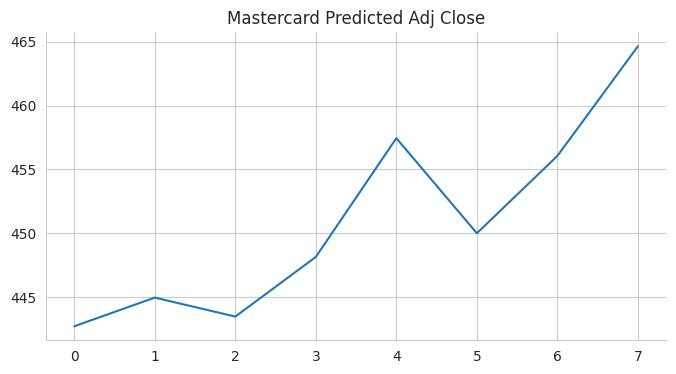

In [71]:
# @title Mastercard Predicted Adj Close

from matplotlib import pyplot as plt
monthly_predictions_table['Mastercard Predicted Adj Close'].plot(kind='line', figsize=(8, 4), title='Mastercard Predicted Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

## Visualize Forecasts

### Subtask:
Plot the historical stock prices along with the generated future forecasts to visually represent the predicted trend.

**Reasoning**:
Plot the historical prices and the Prophet forecasts for both Mastercard and Visa.

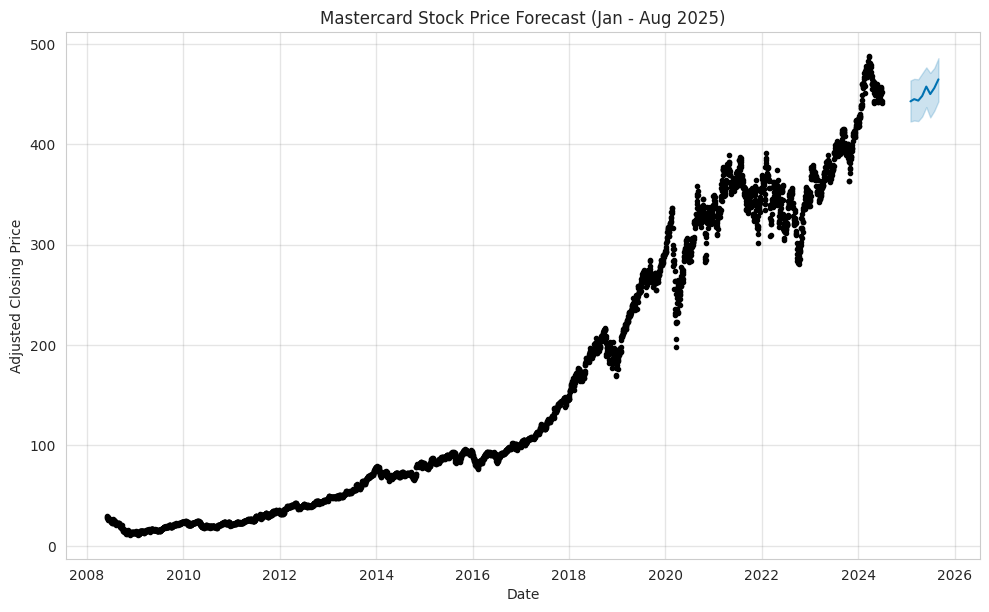

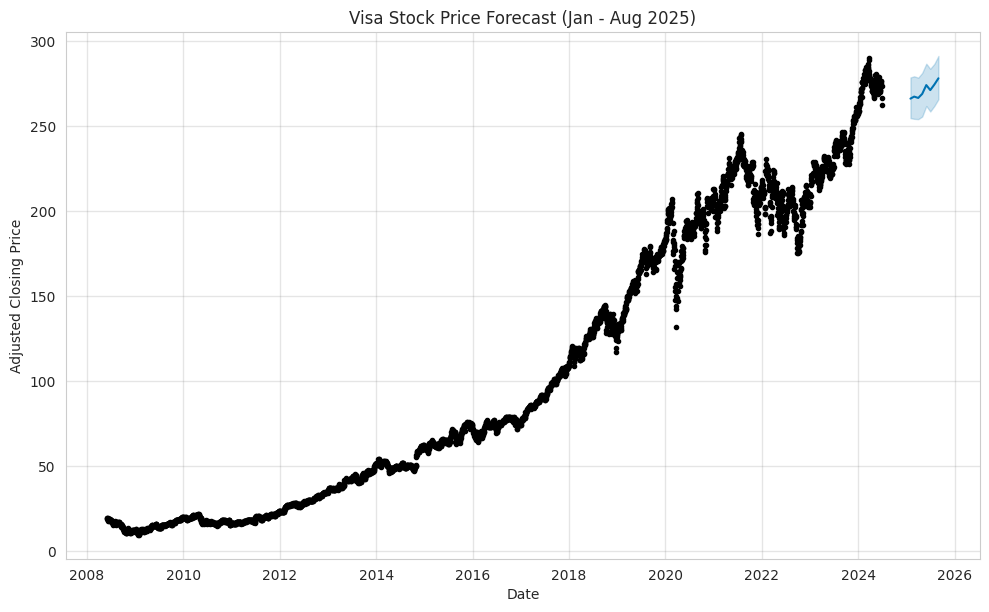

In [69]:
# Plot historical prices and forecasts for Mastercard
mastercard_model.plot(mastercard_forecast)
plt.title('Mastercard Stock Price Forecast (Jan - Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

# Plot historical prices and forecasts for Visa
visa_model.plot(visa_forecast)
plt.title('Visa Stock Price Forecast (Jan - Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

## Notes and Caveats on Stock Price Predictions

It's important to understand the following regarding the stock price forecasts generated using the Prophet model:

1.  **Predictions are based on historical data**: The forecasts are generated by identifying patterns (trend, seasonality) in the historical adjusted closing prices. They assume that these historical patterns will continue into the future, which may not always be the case in the dynamic stock market.
2.  **Prophet is a general-purpose forecasting model**: While Prophet is effective for many time series, it does not incorporate specific financial or economic factors that can significantly influence stock prices (e.g., company news, industry trends, macroeconomic indicators, investor sentiment, unexpected global events).
3.  **Uncertainty in forecasts**: The shaded area around the predicted line in the plots represents the uncertainty interval (95% confidence interval in this case). This interval indicates a range where the actual price is likely to fall, but it can be quite wide, especially for longer forecast horizons, reflecting the inherent unpredictability of stock prices.
4.  **Not financial advice**: These predictions are for informational and educational purposes only and should not be considered financial advice. Stock market investing involves risk, and actual prices may differ significantly from forecasts.
5.  **Model limitations**: Prophet is best suited for time series with strong seasonality and trend. While stock data has trends, the daily fluctuations can be highly volatile and influenced by many external factors not captured by the model.
6.  **Monthly frequency**: The predictions are provided on a monthly basis (end of the month). Daily or even weekly fluctuations within these months are not captured by this forecast granularity.

**In summary**: The forecasts provide a potential trajectory based on historical patterns, but they are subject to significant uncertainty and do not account for many critical factors that drive stock prices. Always conduct thorough research and consult with a financial advisor before making investment decisions.

In [76]:
import pandas as pd
import io

# Provided actual data as a string
actual_data_string = """| Month-end date | MA close (USD) | V close (USD) |
| -------------- | -------------: | ------------: |
| Jan 31, 2025   |         553.80 |        340.66 |
| Feb 28, 2025   |         574.62 |        362.11 |
| Mar 31, 2025   |         546.51 |        349.88 |
| Apr 30, 2025   |         547.32 |        344.93 |
| May 30, 2025   |         584.81 |        365.19 |
| Jun 30, 2025   |         561.18 |        355.05 |
| Jul 31, 2025   |         566.47 |        345.47 |
| Aug 8, 2025\*  |         574.32 |        336.78 |"""

# Parse the markdown table into a DataFrame
# Need to clean up the string to be readable by pandas read_csv
# Remove the header separator line and the asterisk from the last date
actual_data_lines = actual_data_string.strip().split('\n')
# Remove the second line which is the separator
actual_data_lines = [actual_data_lines[0]] + actual_data_lines[2:]
# Join the lines back into a string
cleaned_actual_data_string = '\n'.join(actual_data_lines)

# Use io.StringIO to simulate a file
data_io = io.StringIO(cleaned_actual_data_string)

# Read the data into a pandas DataFrame
# Use a space or | as delimiter, needs careful parsing due to spacing
# Let's manually parse or use regex if read_csv struggles
# Given the format, it's a pipe-separated table. We can use read_csv with '|' as separator
# and skip initial/final spaces and the pipe at the start/end of lines.
actual_df = pd.read_csv(data_io, sep='|', skipinitialspace=True)

# Drop the first and last columns which are empty due to leading/trailing pipes
actual_df = actual_df.iloc[:, 1:-1]

# Clean up column names (remove leading/trailing spaces)
actual_df.columns = actual_df.columns.str.strip()

# Clean up data in cells (remove leading/trailing spaces)
for col in actual_df.columns:
    actual_df[col] = actual_df[col].astype(str).str.strip()

# Rename columns for easier access and clarity
actual_df = actual_df.rename(columns={
    'Month-end date': 'Date',
    'MA close (USD)': 'Mastercard Actual Adj Close',
    'V close (USD)': 'Visa Actual Adj Close'
})

# Convert 'Date' column to datetime objects
# --- Modified cleaning step ---
# Remove any character that is not a letter, digit, comma, or space, then strip whitespace
actual_df['Date'] = actual_df['Date'].str.replace(r'[^\w\s,]', '', regex=True).str.strip()
actual_df['Date'] = pd.to_datetime(actual_df['Date'], format='%b %d, %Y')
# --- End Modified cleaning step ---

# Convert price columns to numeric
actual_df['Mastercard Actual Adj Close'] = pd.to_numeric(actual_df['Mastercard Actual Adj Close'])
actual_df['Visa Actual Adj Close'] = pd.to_numeric(actual_df['Visa Actual Adj Close'])

# Display the parsed actual data
print("Parsed Actual Data:")
display(actual_df)

# Now, compare with the forecast data (monthly_predictions_table)
# The forecast data has 'Date', 'Mastercard Predicted Adj Close', 'Visa Predicted Adj Close'

# Merge actual and predicted data on 'Date'
comparison_df = pd.merge(
    actual_df,
    monthly_predictions_table,
    on='Date',
    how='left' # Use left merge to keep all actual dates
)

# Calculate the difference (Actual - Predicted)
comparison_df['Mastercard Difference'] = comparison_df['Mastercard Actual Adj Close'] - comparison_df['Mastercard Predicted Adj Close']
comparison_df['Visa Difference'] = comparison_df['Visa Actual Adj Close'] - comparison_df['Visa Predicted Adj Close']

# Optionally, calculate percentage error
comparison_df['Mastercard Percentage Error (%)'] = (comparison_df['Mastercard Difference'] / comparison_df['Mastercard Actual Adj Close']) * 100
comparison_df['Visa Percentage Error (%)'] = (comparison_df['Visa Difference'] / comparison_df['Visa Actual Adj Close']) * 100


# Select and reorder columns for the final comparison table
comparison_table = comparison_df[[
    'Date',
    'Mastercard Actual Adj Close',
    'Mastercard Predicted Adj Close',
    'Mastercard Difference',
    'Mastercard Percentage Error (%)',
    'Visa Actual Adj Close',
    'Visa Predicted Adj Close',
    'Visa Difference',
    'Visa Percentage Error (%)'
]]

# Display the comparison table
print("\nForecast vs. Actual Comparison (Jan - Aug 2025):")
display(comparison_table)

# Note: The forecast was generated for month-end dates. The actual data includes
# Aug 8, 2025, which is not a month-end. The comparison for August will be
# between the Aug 8 actual price and the Prophet forecast for Aug 31.
# Also, Prophet forecasts include uncertainty intervals (yhat_lower, yhat_upper)
# which are not shown in this basic comparison table but were in the forecast dataframe.

Parsed Actual Data:


,Date,Mastercard Actual Adj Close,Visa Actual Adj Close
0,2025-01-31,553.80,340.66
1,2025-02-28,574.62,362.11
2,2025-03-31,546.51,349.88
3,2025-04-30,547.32,344.93
4,2025-05-30,584.81,365.19
5,2025-06-30,561.18,355.05
6,2025-07-31,566.47,345.47
7,2025-08-08,574.32,336.78



Forecast vs. Actual Comparison (Jan - Aug 2025):


,Date,Mastercard Actual Adj Close,Mastercard Predicted Adj Close,Mastercard Difference,Mastercard Percentage Error (%),Visa Actual Adj Close,Visa Predicted Adj Close,Visa Difference,Visa Percentage Error (%)
0,2025-01-31,553.80,442.715137,111.084863,20.058661,340.66,266.206734,74.453266,21.855594
1,2025-02-28,574.62,444.960218,129.659782,22.564440,362.11,267.404776,94.705224,26.153717
2,2025-03-31,546.51,443.473465,103.036535,18.853550,349.88,266.611321,83.268679,23.799211
3,2025-04-30,547.32,448.143335,99.176665,18.120417,344.93,268.983846,75.946154,22.017845
4,2025-05-30,584.81,NaN,NaN,NaN,365.19,NaN,NaN,NaN
5,2025-06-30,561.18,449.998481,111.181519,19.812096,355.05,271.228277,83.821723,23.608428
6,2025-07-31,566.47,456.052549,110.417451,19.492197,345.47,274.473054,70.996946,20.550828
7,2025-08-08,574.32,NaN,NaN,NaN,336.78,NaN,NaN,NaN


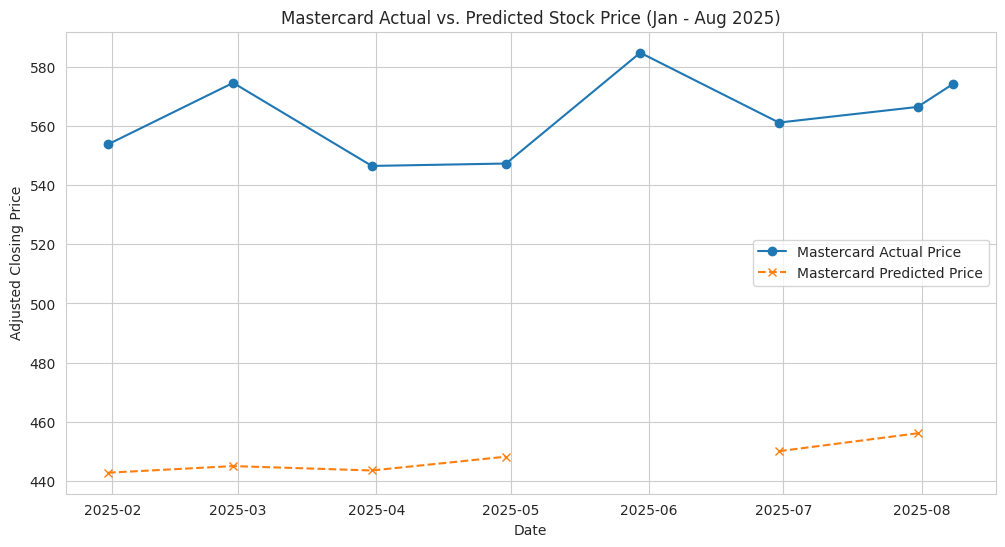

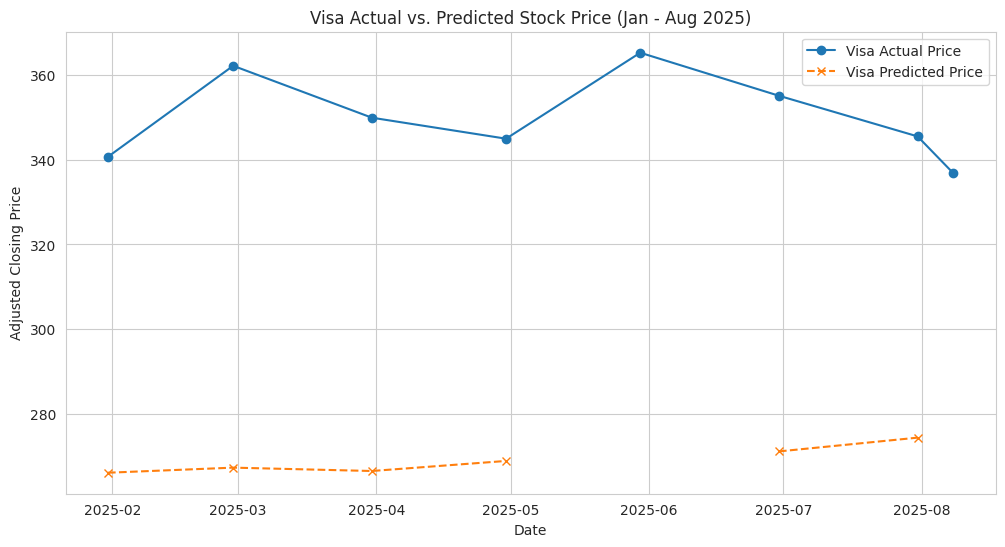

In [77]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices for Mastercard
plt.figure(figsize=(12, 6))
plt.plot(comparison_table['Date'], comparison_table['Mastercard Actual Adj Close'], marker='o', linestyle='-', label='Mastercard Actual Price')
plt.plot(comparison_table['Date'], comparison_table['Mastercard Predicted Adj Close'], marker='x', linestyle='--', label='Mastercard Predicted Price')
plt.title('Mastercard Actual vs. Predicted Stock Price (Jan - Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted prices for Visa
plt.figure(figsize=(12, 6))
plt.plot(comparison_table['Date'], comparison_table['Visa Actual Adj Close'], marker='o', linestyle='-', label='Visa Actual Price')
plt.plot(comparison_table['Date'], comparison_table['Visa Predicted Adj Close'], marker='x', linestyle='--', label='Visa Predicted Price')
plt.title('Visa Actual vs. Predicted Stock Price (Jan - Aug 2025)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

Based on our analysis of the Mastercard and Visa stock data from 2008 to 2024:

*   **Basic Performance Metrics**:
    *   Mastercard had a slightly higher **Annualized Return** (~21.79%) compared to Visa (~20.38%).
    *   Mastercard also exhibited higher **Annualized Volatility** (~31.49%) than Visa (~28.62%), suggesting higher risk.
    *   Visa had a slightly better **Sharpe Ratio** (~0.7121) than Mastercard (~0.6919), indicating a slightly better risk-adjusted return over this period (assuming a near-zero risk-free rate).
    *   Mastercard experienced a larger **Max Drawdown** (~ -62.67%) compared to Visa (~ -51.39%), indicating a more significant peak-to-trough decline during the worst period.

*   **Price and Returns Visualization**:
    *   The **Price Index** plot clearly shows the significant growth in the adjusted closing prices for both stocks since 2008, with both stocks showing a similar upward trend over the long term.
    *   The **Cumulative Returns** plot mirrors the price index, illustrating the substantial cumulative growth of an investment in both stocks over the period.
    *   The **Rolling 60-Day Volatility** plot shows periods of higher and lower volatility for both stocks, with some synchronized spikes, particularly during market downturns. Visa generally appears to have slightly lower rolling volatility than Mastercard.
    *   The **Rolling 60-Day Correlation** plot shows that the correlation between Mastercard and Visa returns has generally remained positive and relatively high over the period, indicating that their price movements are strongly linked. There are fluctuations in the correlation, but they tend to move in the same direction.

*   **Return Distribution**:
    *   The **histograms** of daily returns show that the distributions for both stocks are somewhat peaked around zero, which is typical for stock returns.
    *   The **QQ plots** show deviations from the straight line, particularly in the tails, suggesting that the daily returns have fatter tails than a normal distribution. This means extreme positive and negative returns occur more often than would be expected under a normal distribution assumption.

*   **Drawdown Visualization**:
    *   The **drawdown plots** highlight the periods and magnitudes of price declines from previous peaks for both stocks. The plots visually confirm that Mastercard experienced a deeper maximum drawdown than Visa during significant market downturns.

*   **Detailed Event Study (Shocks)**:
    *   Identifying days with absolute returns ≥ 2× standard deviation revealed a notable number of positive and negative shock days for both stocks.
    *   The **Event Study Summary Table** shows the average forward cumulative returns at 1, 5, and 20 days after positive and negative shocks. For both stocks, positive shocks are followed, on average, by positive returns over the next 20 days, while negative shocks are followed by negative returns, although the magnitude of the average return diminishes over the horizon.
    *   The **Average 20-Day Forward Cumulative Return Paths** plots visually confirm this, showing distinct trajectories for returns following positive versus negative shocks, with confidence intervals indicating the variability around these average paths.

*   **Volume-Volatility Link**:
    *   The **scatter plots** of Normalized Volume vs. Absolute Daily Return suggest a positive relationship, where days with higher relative trading volume tend to be associated with larger absolute daily returns (higher volatility).
    *   The **correlation numbers** (around 0.43 for Mastercard and 0.42 for Visa) quantify this positive relationship, indicating a moderate positive correlation between normalized volume and absolute return.

*   **Top 10 Co-move Days**:
    *   Identifying the top 10 days with the largest absolute product of returns and the top 10 days with the largest sum of absolute returns highlighted specific dates where both stocks experienced significant price movements on the same day. The "Same Sign" flag in the second table shows that on these days of extreme co-movement, the returns for Mastercard and Visa almost always moved in the same direction.

### Insights or Next Steps

*   Both Mastercard and Visa have shown strong growth and are highly correlated, making them less effective for diversification against each other.
*   Visa appears to be slightly less volatile and offered a marginally better risk-adjusted return over the analyzed period compared to Mastercard.
*   The fatter tails observed in the return distributions suggest that standard models assuming normality might underestimate the probability of extreme events.
*   The event study confirms that significant price shocks tend to be followed by continued movement in the same direction, at least in the short term (up to 20 days).
*   There is a clear link between trading volume and volatility for both stocks.

Further analysis could involve:

*   Comparing these stocks against a broader market index or other payment processing companies.
*   Performing more advanced time series analysis (e.g., GARCH models for volatility forecasting).
*   Investigating the specific events that occurred on the identified top co-move days or during periods of high volatility/drawdown.
*   Considering transaction costs and dividends for a more complete picture of investment performance.